Vasmos a cargar el dataset de AirBnB descargado de [aquí](https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&q=Madrid&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6Imhvc3RfbGlzdGluZ3NfY291bnQiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiY2l0eSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6IiIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJyb29tX3R5cGUiLCJjb25maWciOnsiZGF0YXNldCI6ImFpcmJuYi1saXN0aW5ncyIsIm9wdGlvbnMiOnsiZGlzanVuY3RpdmUuaG9zdF92ZXJpZmljYXRpb25zIjp0cnVlLCJkaXNqdW5jdGl2ZS5hbWVuaXRpZXMiOnRydWUsImRpc2p1bmN0aXZlLmZlYXR1cmVzIjp0cnVlfX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=16,41.38377,2.15774&basemap=jawg.streets)

![](img/descargar.png)

In [1]:
airbnb<-read.csv('airbnb-listings.csv',sep = ';')
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)

Vamos a quedarnos con las columnas de mayor interés:

'City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude'

In [2]:
col_mayor_interes <- c('City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price',
                       'Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude')
length(col_mayor_interes)

airbnb <- airbnb[ , (colnames(airbnb) %in% col_mayor_interes)]

[1] 14

In [3]:
colnames(airbnb)
dim(airbnb)

[1] "Neighbourhood"        "City"                 "Latitude"            
 [4] "Longitude"            "Room.Type"            "Accommodates"        
 [7] "Bathrooms"            "Bedrooms"             "Beds"                
[10] "Square.Feet"          "Price"                "Guests.Included"     
[13] "Extra.People"         "Review.Scores.Rating"

[1] 14780    14

Nos quedarmos solo con las entradas de Madrid para Room.Type=="Entire home/apt" y cuyo barrio (Neighbourhood) no está vacio ''
Podemos eliminar las siguientes columnas que ya no son necesarias:
"Room.Type",'City'

Llama a nuevo dataframe df_madrid.

In [4]:
df_madrid <- subset(airbnb, City == 'Madrid' & Room.Type=="Entire home/apt" & Neighbourhood != '')
df_madrid$Room.Type <- NULL
df_madrid$City <- NULL

In [5]:
dim(df_madrid)
head(df_madrid)
summary(df_madrid)

[1] 5601   12

,Neighbourhood,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Square.Feet,Price,Guests.Included,Extra.People,Review.Scores.Rating
,<fct>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
26,Palacio,40.41706,-3.709482,3,1,0,2,NA,65,2,10,96
27,Palacio,40.41934,-3.709556,5,2,2,3,NA,100,4,25,97
28,Palacio,40.42113,-3.708628,6,1,2,4,NA,89,2,10,94
29,La Latina,40.41203,-3.709668,4,1,1,2,0,49,2,20,89
30,La Latina,40.41205,-3.708516,4,1,1,1,NA,89,2,15,97
33,La Latina,40.41189,-3.712093,2,1,1,1,NA,61,1,0,95


     Neighbourhood     Latitude       Longitude       Accommodates   
 Malasaña   : 679   Min.   :40.33   Min.   :-3.835   Min.   : 1.000  
 Embajadores: 585   1st Qu.:40.41   1st Qu.:-3.707   1st Qu.: 3.000  
 La Latina  : 571   Median :40.42   Median :-3.702   Median : 4.000  
 Sol        : 536   Mean   :40.42   Mean   :-3.699   Mean   : 4.101  
 Cortes     : 441   3rd Qu.:40.43   3rd Qu.:-3.696   3rd Qu.: 5.000  
 Justicia   : 384   Max.   :40.51   Max.   :-3.576   Max.   :16.000  
 (Other)    :2405                                                    
   Bathrooms        Bedrooms           Beds         Square.Feet    
 Min.   :0.000   Min.   : 0.000   Min.   : 1.000   Min.   :   0.0  
 1st Qu.:1.000   1st Qu.: 1.000   1st Qu.: 1.000   1st Qu.:   0.0  
 Median :1.000   Median : 1.000   Median : 2.000   Median : 237.0  
 Mean   :1.248   Mean   : 1.453   Mean   : 2.393   Mean   : 392.6  
 3rd Qu.:1.000   3rd Qu.: 2.000   3rd Qu.: 3.000   3rd Qu.: 646.0  
 Max.   :6.500   Max.   :10.000 

¿Que porcentaje de los apartamentos no muestran los metros cuadrados? Es decir, ¿cuantos tienen NA en Square.Meters?

In [6]:
df_madrid$Square.Meters <-df_madrid$Square.Feet*0.092903
df_madrid$Square.Feet <- NULL

In [7]:
summary(df_madrid$Square.Meters)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00    0.00   22.02   36.47   60.02  480.03    5254 

In [8]:
paste0("Numero de registros: ", nrow(df_madrid))
paste0("Numero de registros con NA: ", sum(is.na(df_madrid$Square.Meters)))
paste0("Porcentaje con NA: ", round(mean(is.na(df_madrid$Square.Meters)*100),2)," %")

[1] "Numero de registros: 5601"

[1] "Numero de registros con NA: 5254"

[1] "Porcentaje con NA: 93.8 %"

De todos los apartamentos que tienen un valor de metros cuadrados diferente de NA 
¿Que porcentaje de los apartamentos tienen 0 metros cuadrados?

In [9]:
cero_square <- sum(df_madrid$Square.Meters == 0,na.rm=TRUE)
porc_cero_square <- round((cero_square/sum(!is.na(df_madrid$Square.Meters)))*100,2)

In [10]:
paste0("Numero de registros que NO son NA: ", sum(!is.na(df_madrid$Square.Meters)))
paste0("Numero de registros que NO son NA y su Square.Meter == 0 son: ", cero_square)
paste0("Esto hace un porcentaje de: ", porc_cero_square,"%")

[1] "Numero de registros que NO son NA: 347"

[1] "Numero de registros que NO son NA y su Square.Meter == 0 son: 128"

[1] "Esto hace un porcentaje de: 36.89%"

Reemplazar todos los 0m^2 por NA 

In [11]:
df_madrid$Square.Meters[df_madrid$Square.Meters == '0' ]<- NA

Son muchos, vamos a intentar crear un modelo que nos prediga cuantos son los metros cuadrados en función del resto de variables para tratar de rellenar esos NA.

Antes de eso deberíamos pintar el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más.

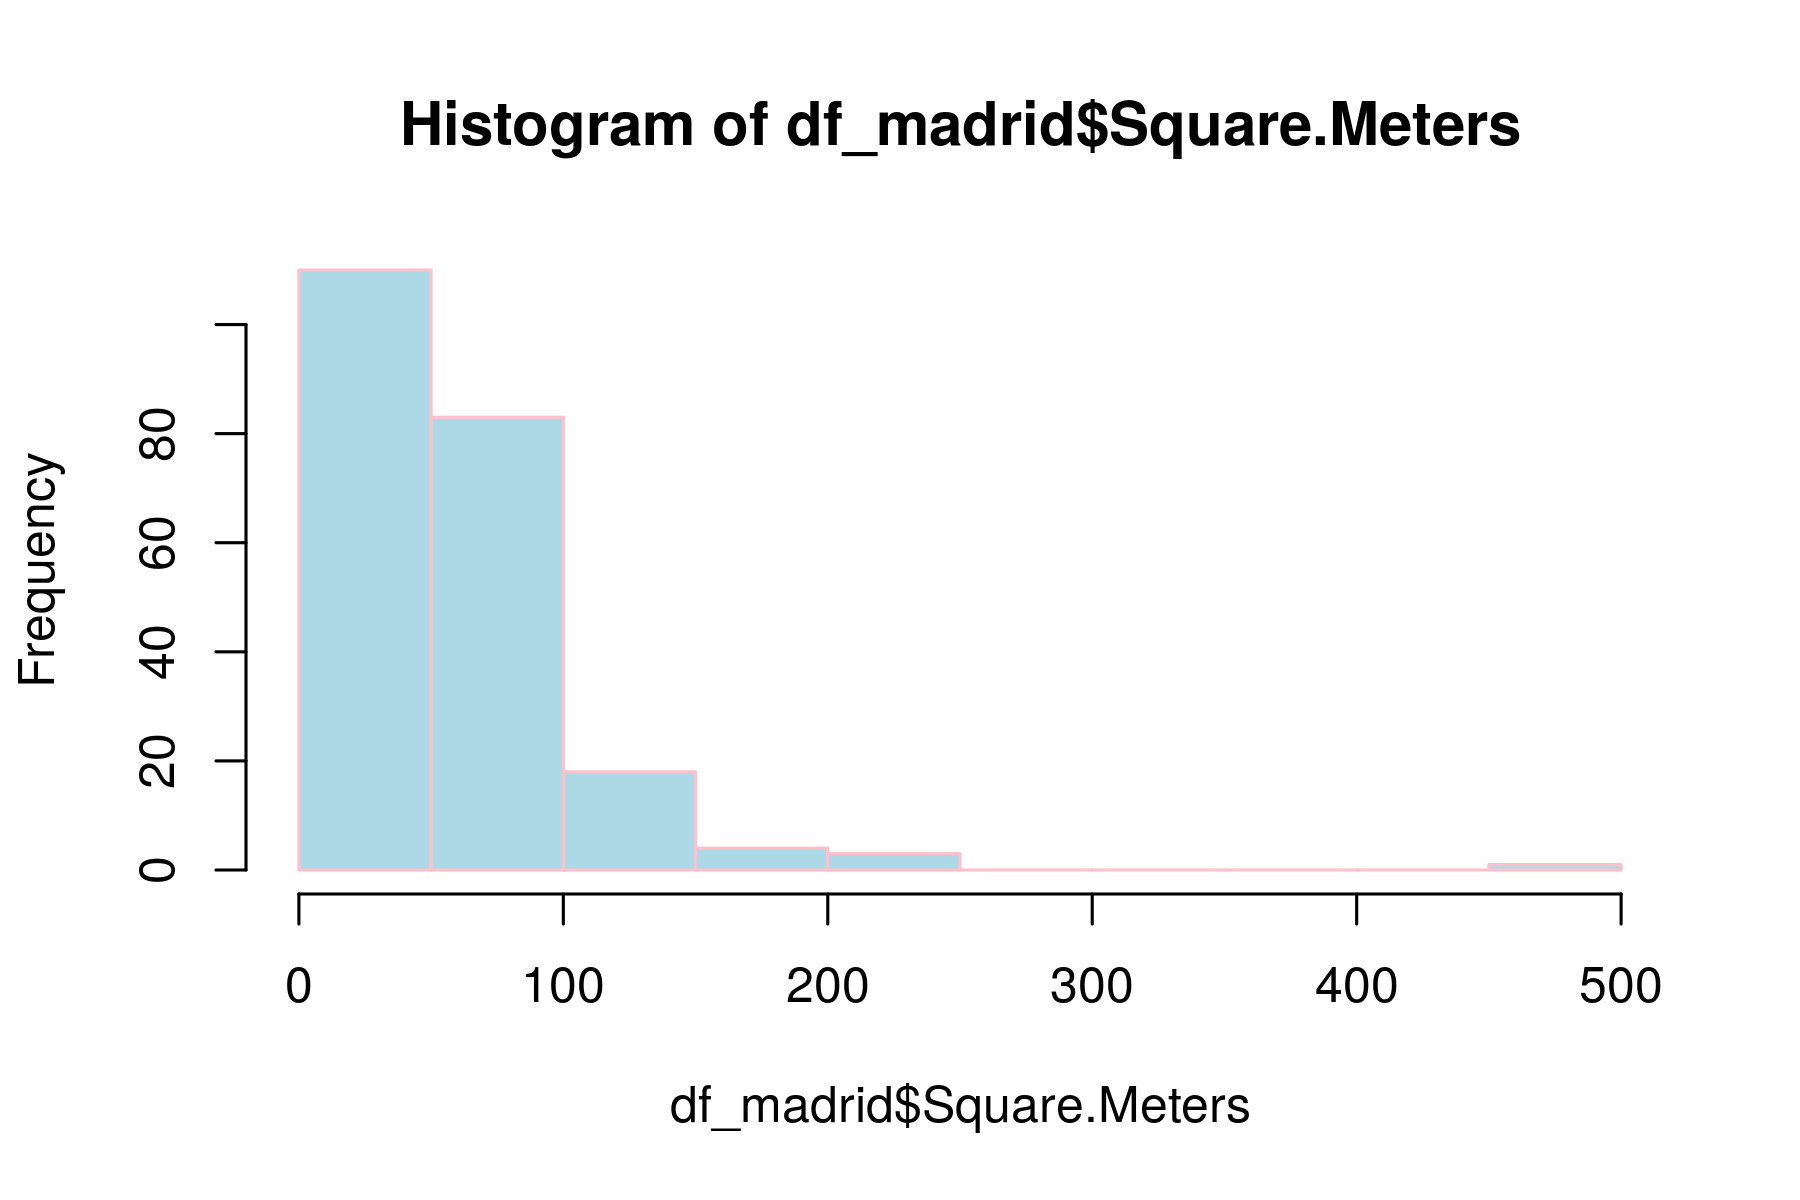

In [12]:
hist(df_madrid$Square.Meters, axes=TRUE, col = "lightblue", border = "pink")

Asigna el valor NA a la columna Square.Meters de los apartamentos que tengan menos de 20 m^2

In [13]:
df_madrid$Square.Meters[df_madrid$Square.Meters < 20 ]<- NA

El barrio parece ser un indicador importante para los metros cuadrados de un apartamento.

Vamos a agrupar los barrios por metros cuadrados. Podemos usar una matriz de similaridad de Tukey tal y como hicimos en el curso de estadística:

Warning message in resm[lower.tri(resm)] <- round(tky.result$p.adj, 4):
“number of items to replace is not a multiple of replacement length”


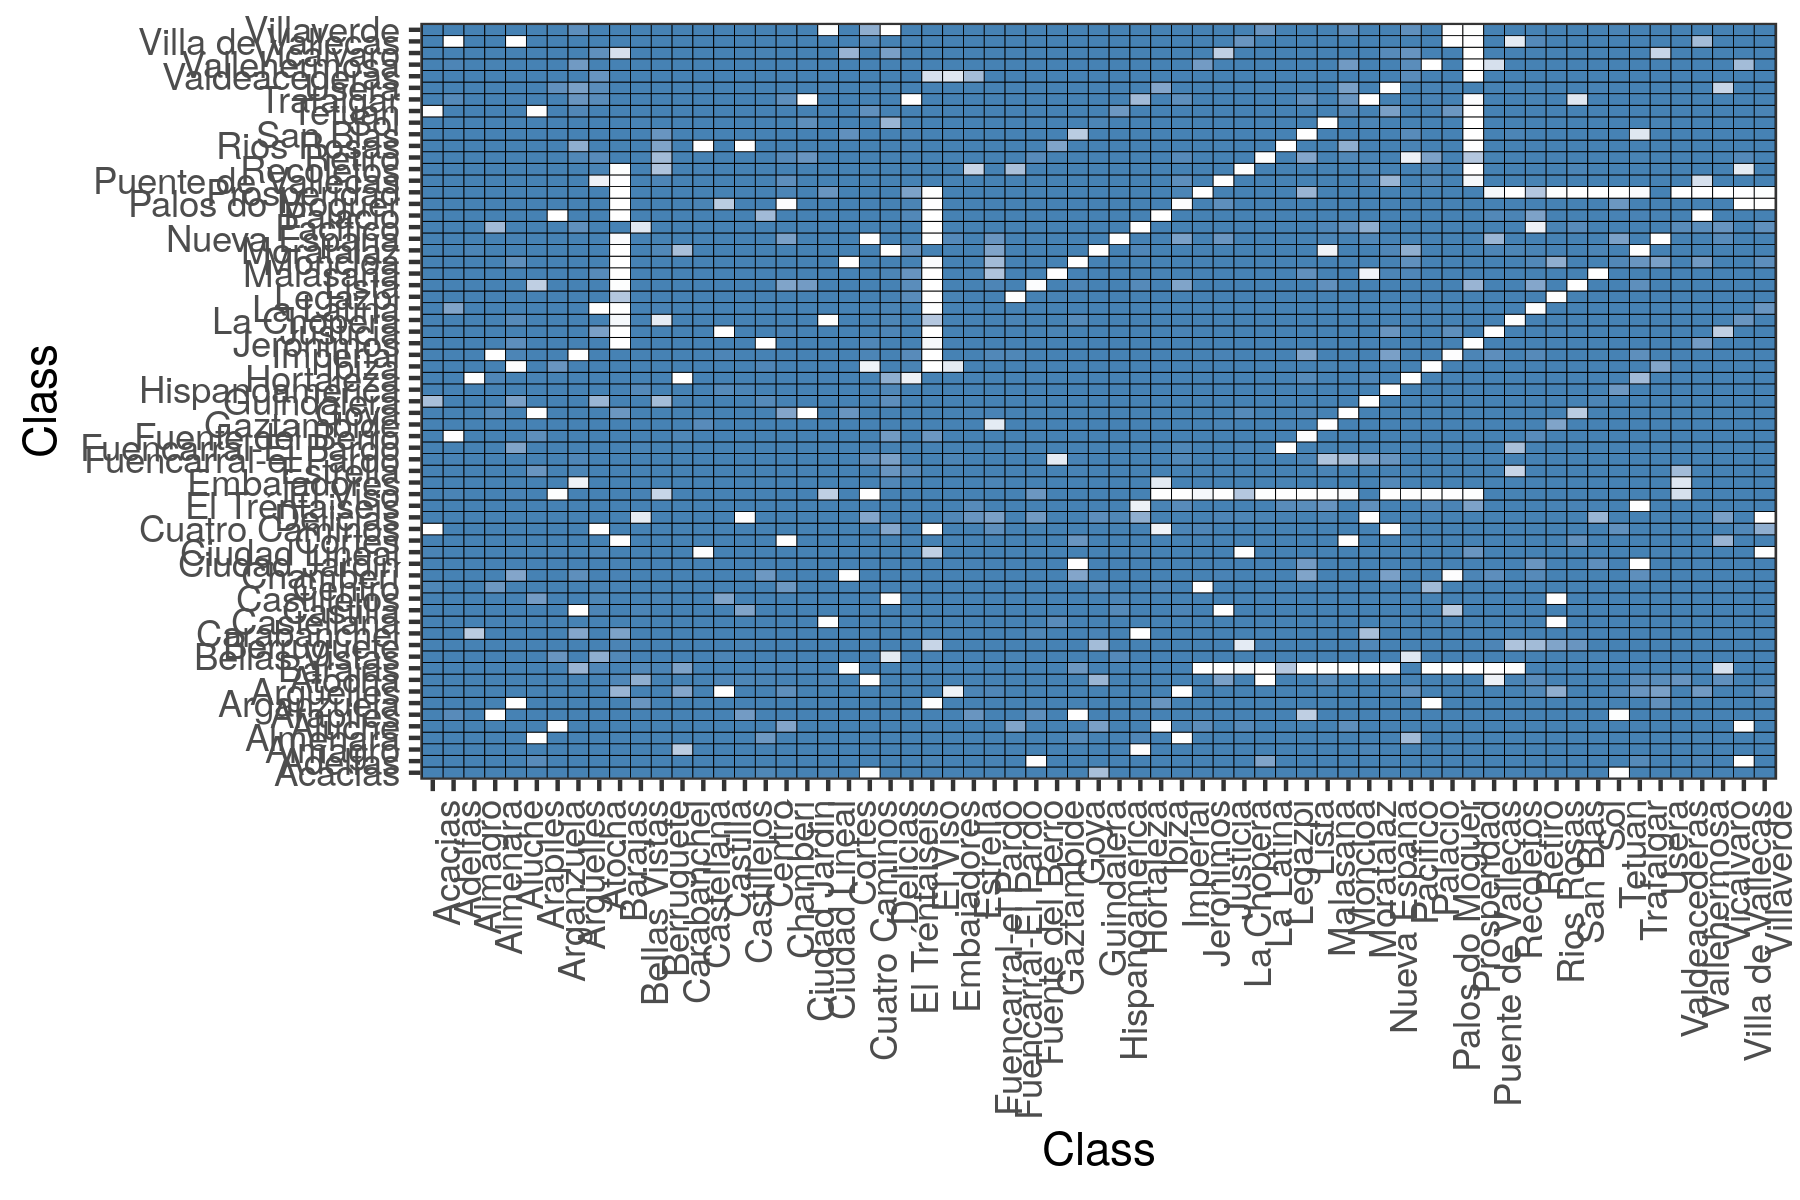

In [14]:
tky<-TukeyHSD(aov( formula=Square.Meters~Neighbourhood, data=df_madrid ))
tky.result<-data.frame(tky$Neighbourhood)
cn <-sort(unique(df_madrid$Neighbourhood))
resm <- matrix(NA, length(cn),length(cn))
rownames(resm) <- cn
colnames(resm) <- cn
resm[lower.tri(resm) ] <- round(tky.result$p.adj,4)
resm[upper.tri(resm) ] <- t(resm)[upper.tri(resm)] 
diag(resm) <- 1
library(ggplot2)
library(reshape2)
dfResm <- melt(resm)
ggplot(dfResm, aes(x=Var1, y=Var2, fill=value))+
  geom_tile(colour = "black")+
  scale_fill_gradient(low = "white",high = "steelblue")+
  ylab("Class")+xlab("Class")+theme_bw()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1),legend.position="none")

Usando como variable de distancia: 1-resm
Dibuja un dendrograma de los diferentes barrios.


In [15]:
install.packages("dendextend")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




---------------------
Welcome to dendextend version 1.13.4
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
Or contact: <tal.galili@gmail.com>

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------



Attaching package: ‘dendextend’


The following object is masked from ‘package:stats’:

    cutree




[1] 2080

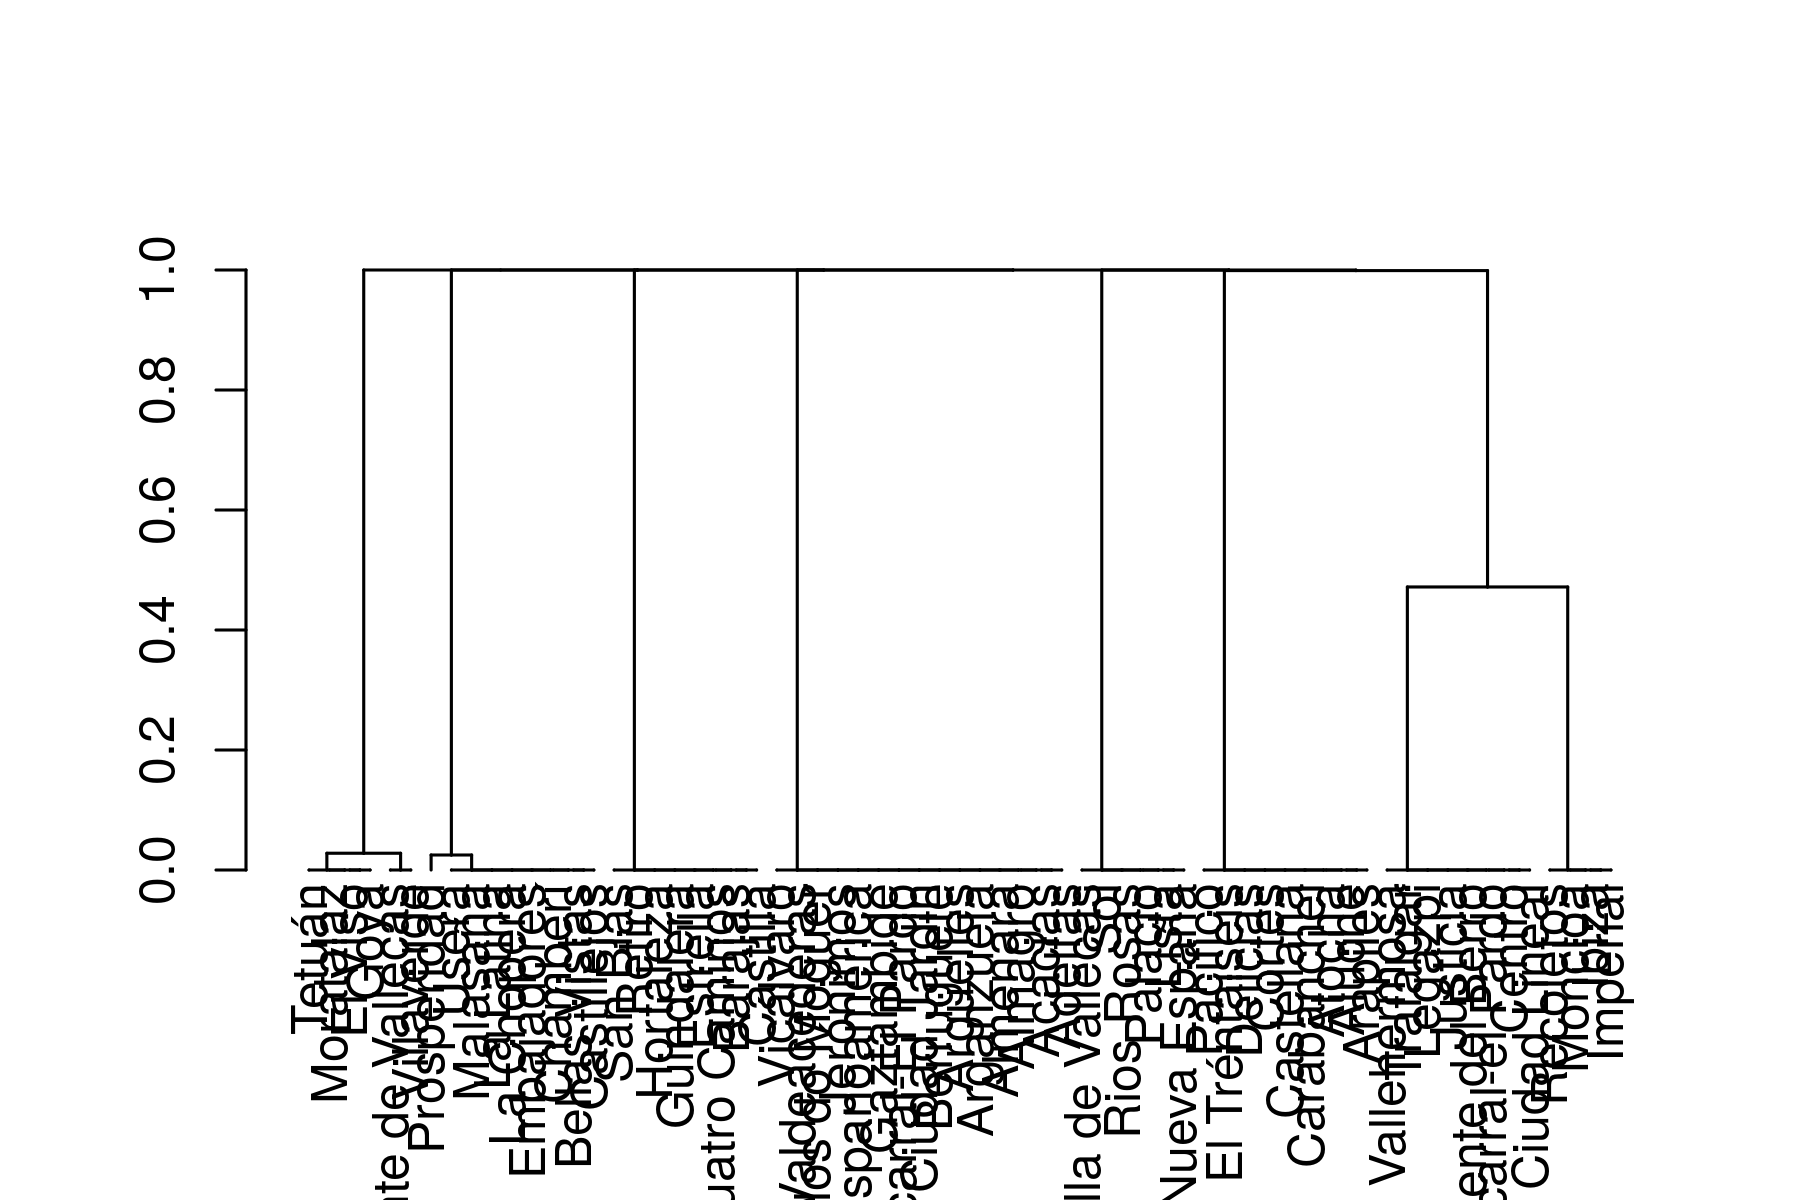

In [16]:
library(dendextend)
d <- as.dist(1-resm)
length(d)

# centroid ward.D war.D2 single complete average mcquitty median
hc <- hclust(d,method="complete")

hcd <- as.dendrogram(hc)
plot(hcd)

In [17]:
str(d)

 'dist' num [1:2080] 0 0 0 0 0 ...
 - attr(*, "Labels")= chr [1:65] "Acacias" "Adelfas" "Almagro" "Almenara" ...
 - attr(*, "Size")= int 65
 - attr(*, "call")= language as.dist.default(m = 1 - resm)
 - attr(*, "Diag")= logi FALSE
 - attr(*, "Upper")= logi FALSE


Estableciendo un punto de corte en 0.9, ¿cuantos clusters aparecen?

[1] 7

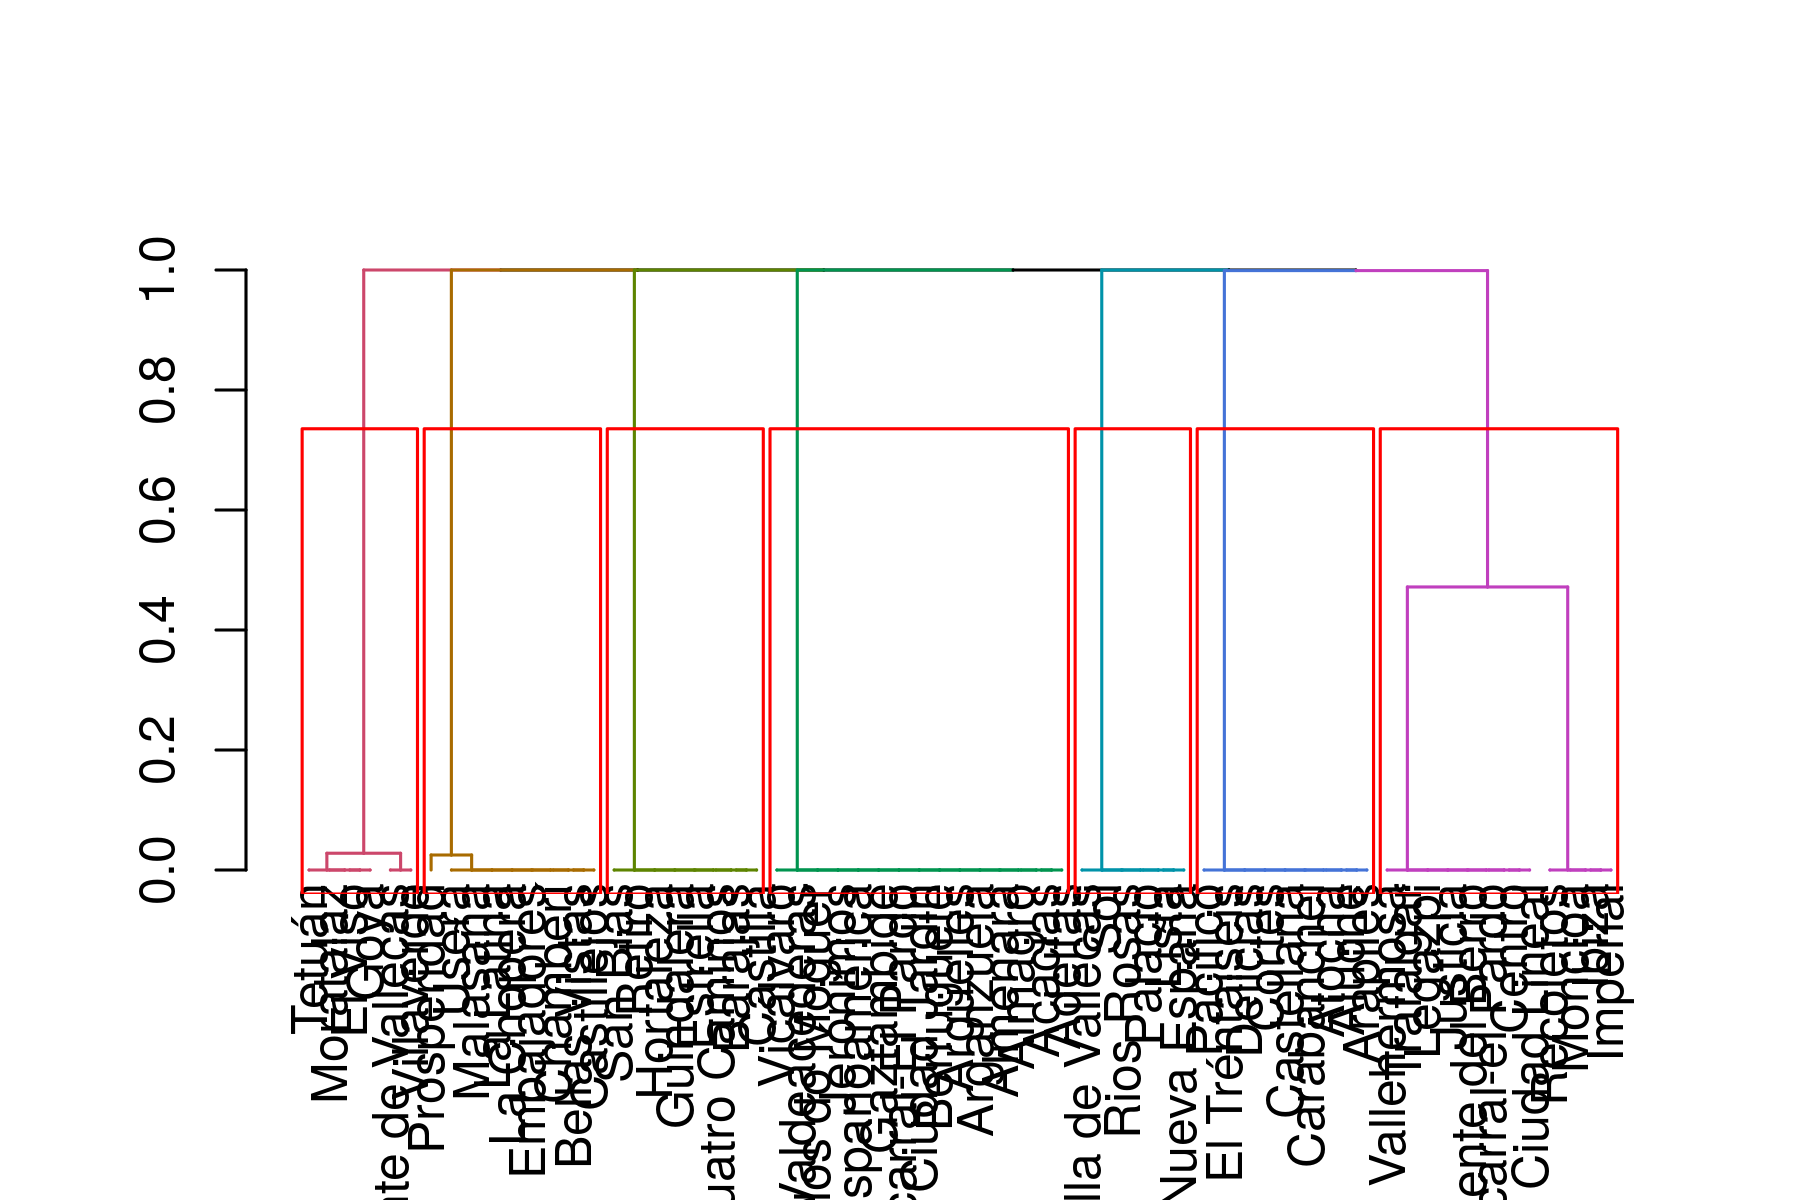

In [18]:
library(cluster)
plot(color_branches(hcd,h=0.9))
num_clusters <- rect.hclust(hc, h=0.9)
length(num_clusters)

In [19]:
d.tree <- hclust(d, method="complete")
d.dend <- as.dendrogram(d.tree) 

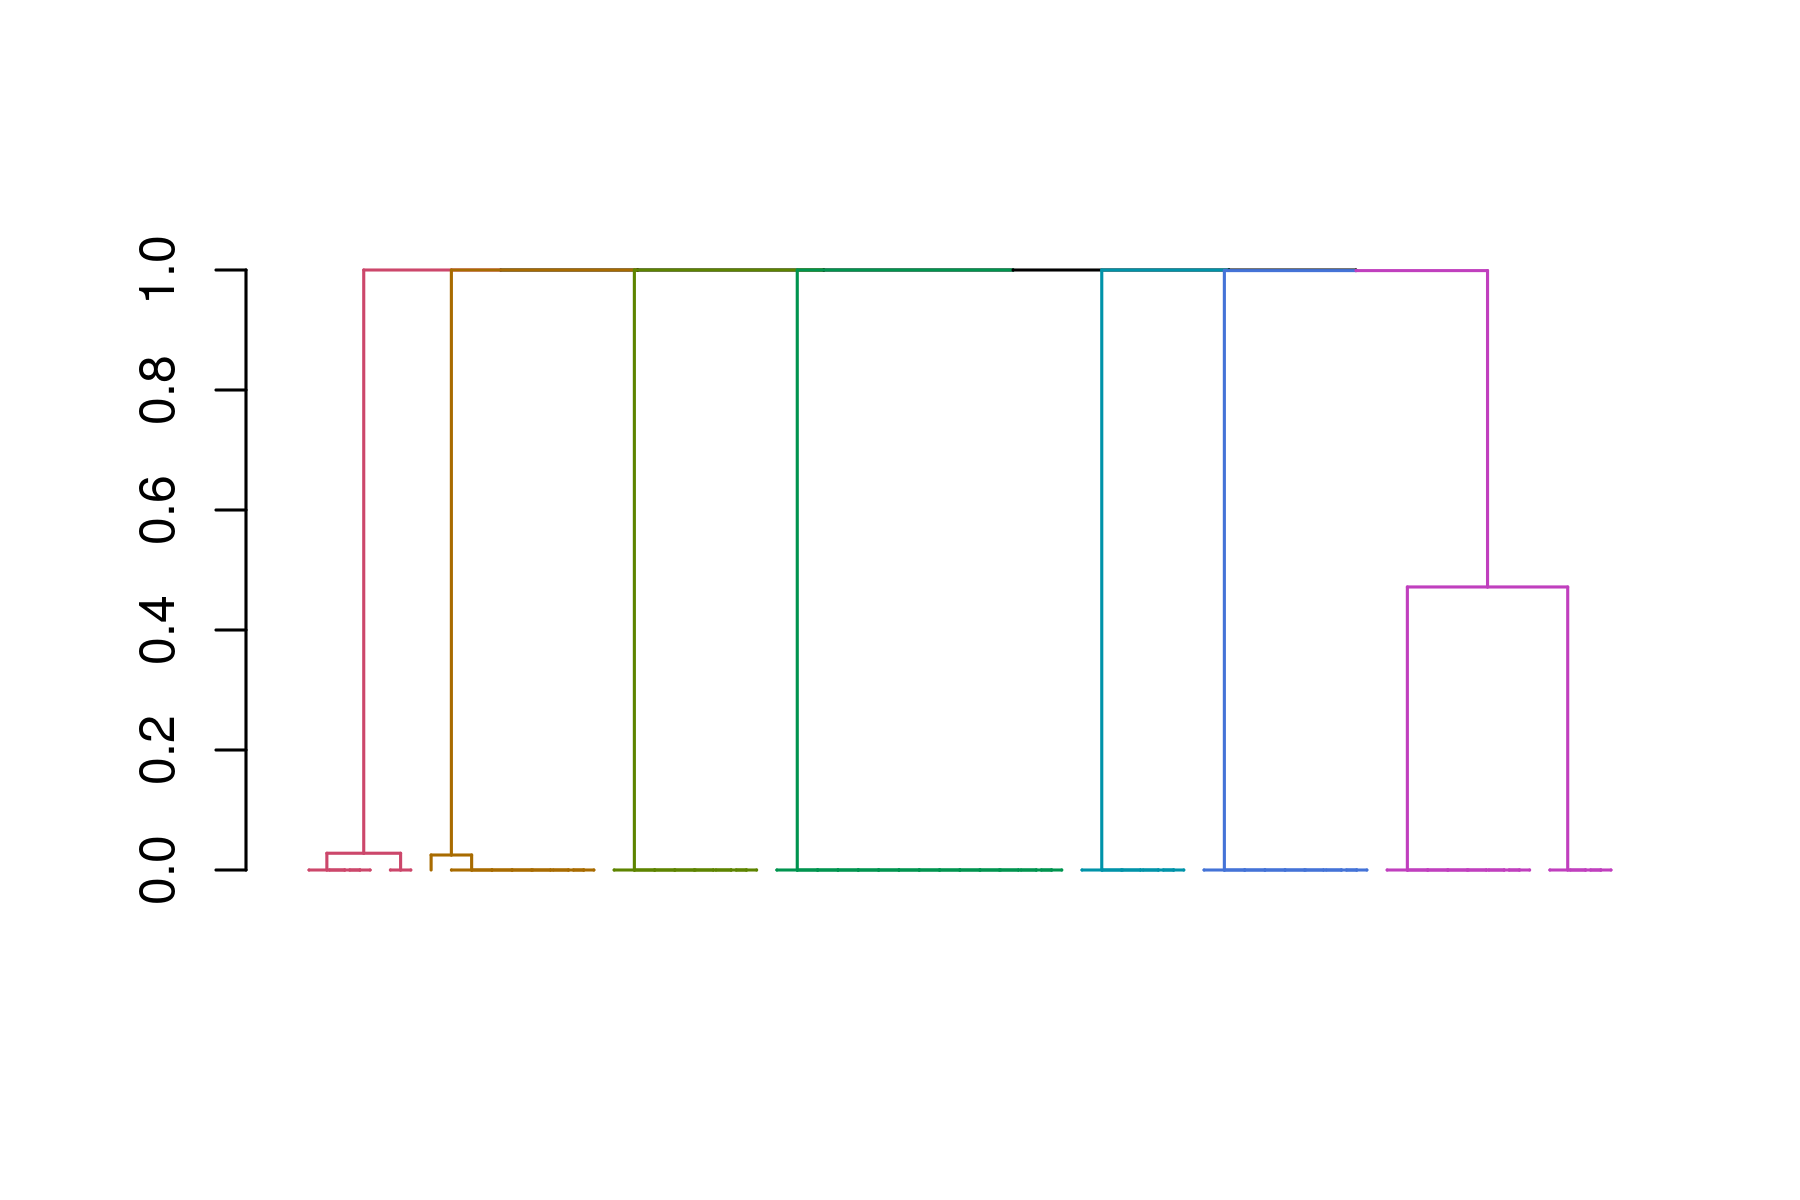

In [20]:
clusters <- cutree(d.dend, k=length(num_clusters))
plot(color_branches(d.dend, k=length(num_clusters)),leaflab="none")

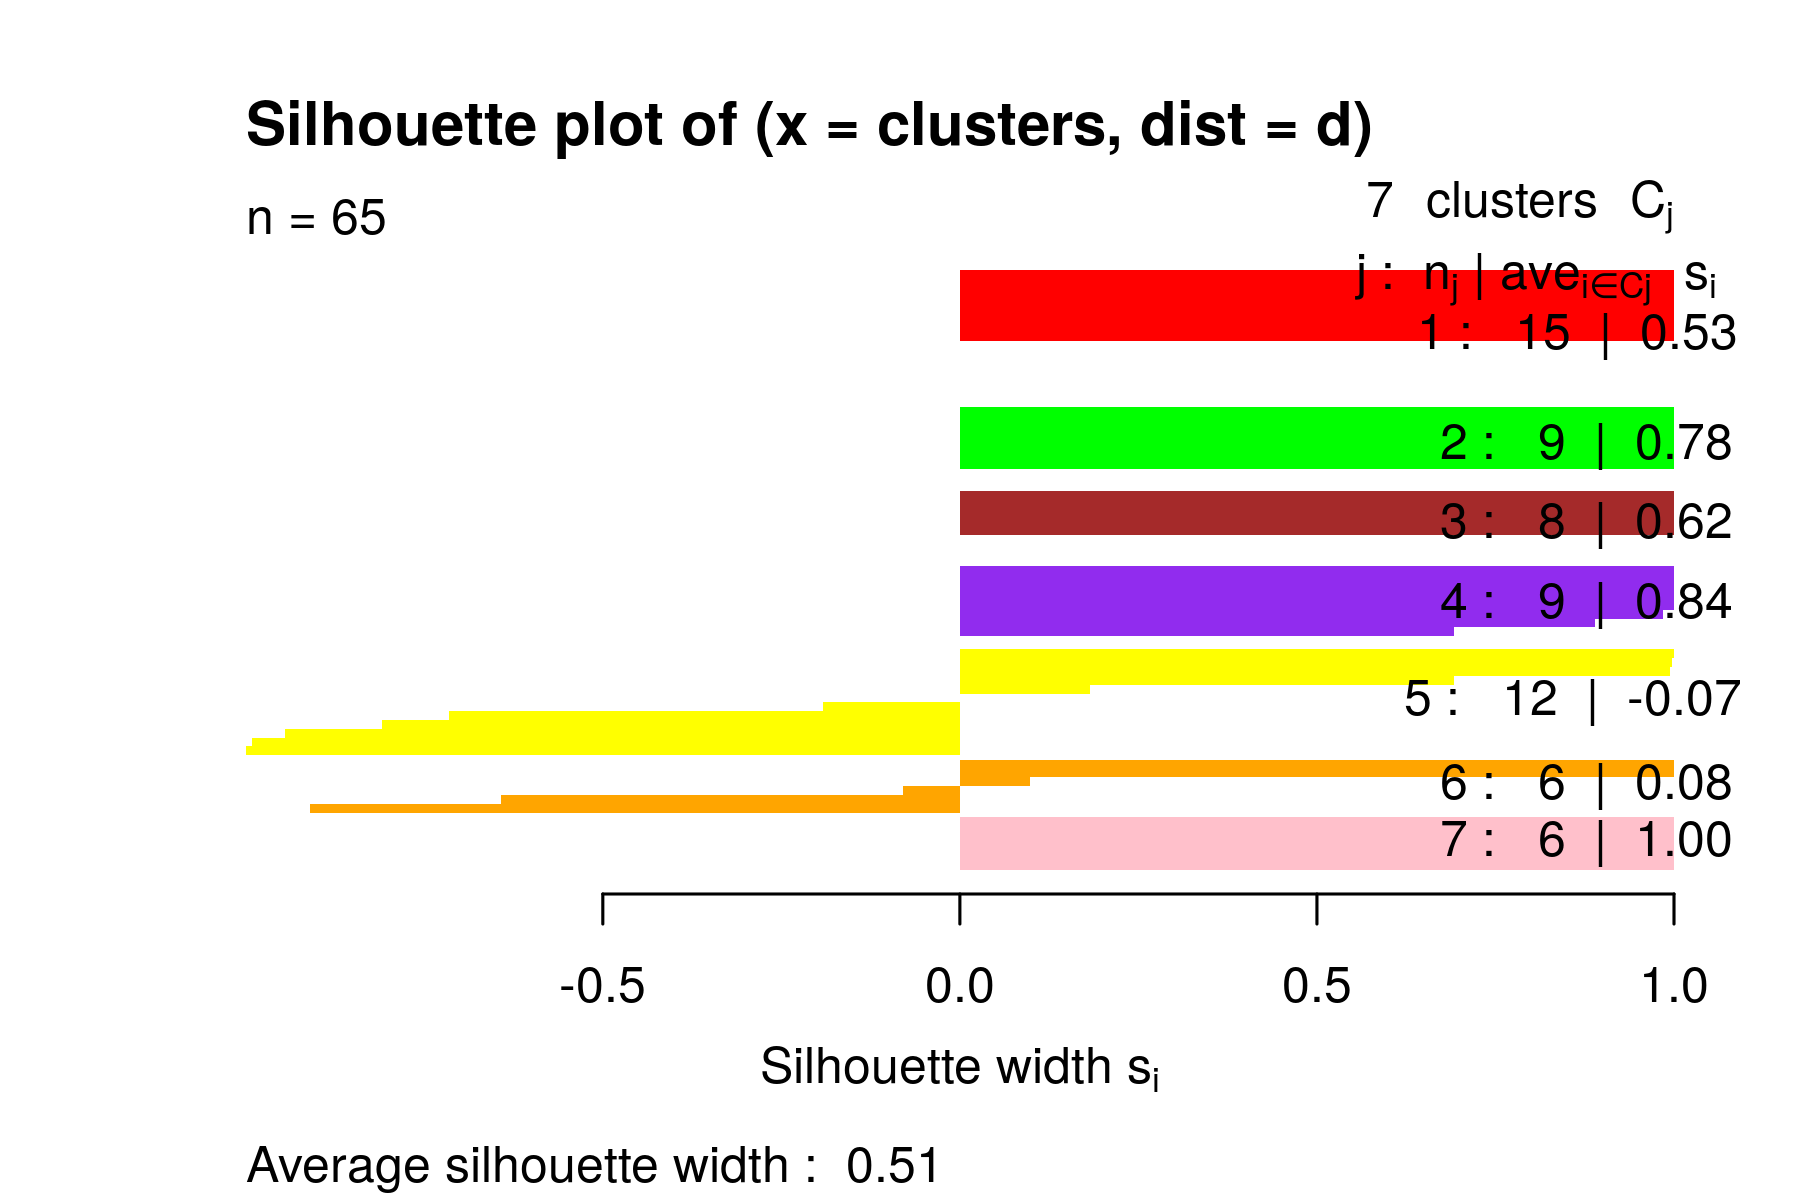

In [21]:
ss<-silhouette(clusters, d)
plot(ss,col= c("red", "green", "brown", "purple2", "yellow", "orange", "pink"),border=NA)

#  He puesto estos colores fijos al ver que me salian 7 cluster y no la formula
#  plot(ss,col= 1:length(num_clusters),border=NA)
#  ya que he sido incapaz de que no saliera el color negro y no dejaba ver los datos del primer cluster.

In [22]:
hc$height[hc$height<0.9]
cutree(hc,k=length(num_clusters))
hc$height[hc$height>0.9]

[1] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
[11] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
[21] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
[31] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
[41] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
[51] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0250 0.0279 0.4717

Acacias             Adelfas             Almagro            Almenara 
                  1                   1                   1                   1 
             Aluche            Arapiles          Arganzuela           Argüelles 
                  2                   2                   1                   1 
             Atocha             Barajas       Bellas Vistas          Berruguete 
                  2                   3                   4                   1 
        Carabanchel          Castellana            Castilla         Castillejos 
                  2                   2                   3                   4 
             Centro            Chamberí       Ciudad Jardin       Ciudad Lineal 
                  5                   4                   1                   5 
             Cortes      Cuatro Caminos            Delicias      El Tréntaiseis 
                  2                   3                   2                   2 
            El Viso         Embajadores            Estrella Fuencarral-el Pardo 
                  6                   4                   3                   5 
Fuencarral-El Pardo    Fuente del Berro          Gaztambide                Goya 
                  1                   5                   1                   6 
         Guindalera      Hispanoamérica           Hortaleza               Ibiza 
                  3                   1                   3                   5 
           Imperial           Jerónimos            Justicia          La Chopera 
                  5                   1                   5                   4 
          La Latina             Legazpi               Lista            Malasaña 
                  4                   5                   7                   4 
            Moncloa           Moratalaz        Nueva España            Pacifico 
                  5                   6                   7                   2 
            Palacio     Palos do Moguer         Prosperidad  Puente de Vallecas 
                  7                   1                   4                   6 
          Recoletos              Retiro          Rios Rosas            San Blas 
                  5                   3                   7                   3 
                Sol              Tetuán           Trafalgar               Usera 
                  7                   6                   5                   4 
      Valdeacederas        Vallehermosa           Vicálvaro   Villa de Vallecas 
                  1                   5                   1                   7 
         Villaverde 
                  6

[1] 0.9990 0.9999 1.0000 1.0000 1.0000 1.0000

Vamos a crear una nueva columna en el dataframe df_madrid con un nuevo identificador marcado por los clusters obtenidos. Esta columna la llamaremos neighb_id

In [23]:
neighb_id <- data.frame(cutree(hc,h=0.9))
names(neighb_id)<-'neighb_id'
neighb_id$Neighbourhood<-rownames(neighb_id)
df_madrid<-merge(df_madrid,neighb_id,by='Neighbourhood',all=TRUE)

In [24]:
df_madrid$Neighbourhood <- droplevels(df_madrid$Neighbourhood)
with(df_madrid, table(df_madrid$Neighbourhood,df_madrid$neighb_id))

                     
                        1   2   3   4   5   6   7
  Acacias              33   0   0   0   0   0   0
  Adelfas              26   0   0   0   0   0   0
  Almagro              75   0   0   0   0   0   0
  Almenara             20   0   0   0   0   0   0
  Aluche                0  81   0   0   0   0   0
  Arapiles              0  66   0   0   0   0   0
  Arganzuela            2   0   0   0   0   0   0
  Argüelles           118   0   0   0   0   0   0
  Atocha                0   5   0   0   0   0   0
  Barajas               0   0  11   0   0   0   0
  Bellas Vistas         0   0   0  27   0   0   0
  Berruguete           23   0   0   0   0   0   0
  Carabanchel           0  76   0   0   0   0   0
  Castellana            0  51   0   0   0   0   0
  Castilla              0   0  17   0   0   0   0
  Castillejos           0   0   0  35   0   0   0
  Centro                0   0   0   0  13   0   0
  Chamberí              0   0   0  14   0   0   0
  Ciudad Jardin        18   

In [25]:
df_madrid$neighb_id <- as.factor(df_madrid$neighb_id)
length(colnames(df_madrid))
df_madrid$neighb_id

[1] 13

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [149] 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [186] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [223] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [260] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [297] 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [334] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [371] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [408] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4
 [445] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [482] 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [519] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [556] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [593] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [630] 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [667] 5 5 5 5 5 5 5 5 5 5 5 5 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 1 1 1 1 1 1 1 1 1
 [704] 1 1 1 1 1 1 1 1 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 [741] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 [778] 5 5 5 5 5 5 5 5 5 5 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [815] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [852] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [889] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [926] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [963] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[1000] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[1037] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[1074] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[1111] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[1148] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[1185] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[1222] 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[1259] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[1296] 2 2 2 2 2 2 2 2 2 2 2 2 2 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 4 4 4 4 4 4
[1333] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
[1370] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
[1407] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
[1444] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
[1481] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
[1518] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
[1555] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
[1592] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
[1629] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
[1666] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
[1703] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
[1740] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
[1777] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
[1814] 4 4 4 4 4 4 4 4 4 4 4 4 4 4

Vamos a crear dos grupos, uno test y otro train.

Tratamos de predecir los metros cuadrados en función del resto de columnas del dataframe.

In [26]:
df_madrid2 <- df_madrid[,2:13]

In [27]:
set.seed(12346)
idx<-sample(1:nrow(df_madrid2),nrow(df_madrid2)*0.8)
df_madrid_train<-df_madrid2[idx,]
df_madrid_test <-df_madrid2[-idx,]
sort(unique(df_madrid_train$neighb_id))
sort(unique(df_madrid_test$neighb_id))

[1] 1 2 3 4 5 6 7
Levels: 1 2 3 4 5 6 7

[1] 1 2 3 4 5 6 7
Levels: 1 2 3 4 5 6 7

In [28]:
model_df_madrid<-lm(Square.Meters~.,data=df_madrid_train)
model_df_madrid$coefficients
summary(model_df_madrid)

(Intercept)             Latitude            Longitude 
        296.43523285          -5.75723198          33.68549792 
        Accommodates            Bathrooms             Bedrooms 
          3.45550792          36.33351383          12.09177140 
                Beds                Price      Guests.Included 
          3.76977350           0.06196893          -6.07489147 
        Extra.People Review.Scores.Rating           neighb_id2 
          0.19739244           0.68906724         -21.80693803 
          neighb_id3           neighb_id4           neighb_id5 
        -26.18082739         -22.88334042         -21.96336448 
          neighb_id6           neighb_id7 
        -18.78483448         -12.93611259


Call:
lm(formula = Square.Meters ~ ., data = df_madrid_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-66.736 -11.468  -0.865  10.062 127.100 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           296.43523 7106.18724   0.042  0.96679    
Latitude               -5.75723  174.60249  -0.033  0.97375    
Longitude              33.68550  130.78920   0.258  0.79718    
Accommodates            3.45551    2.41700   1.430  0.15535    
Bathrooms              36.33351    5.19220   6.998 1.48e-10 ***
Bedrooms               12.09177    3.75560   3.220  0.00164 ** 
Beds                    3.76977    2.42490   1.555  0.12261    
Price                   0.06197    0.03448   1.797  0.07472 .  
Guests.Included        -6.07489    2.16082  -2.811  0.00574 ** 
Extra.People            0.19739    0.25112   0.786  0.43336    
Review.Scores.Rating    0.68907    0.25759   2.675  0.00849 ** 
neighb_id2            -21.80694    9.30665  -2.343  0.02073 

In [29]:
# He encontrado mirando documentacion esta funcion que sengun entendi evalua el mejor modelo de las variables que pasemos.
# Pero he decidido otro modelo distinto que me completa mas NAs y ya que el dataset venia sin tantos, he pensado que seria mejor

step(object = model_df_madrid, direction ='both', trace = 1)
length(model_df_madrid$coefficients)

Start:  AIC=907.32
Square.Meters ~ Latitude + Longitude + Accommodates + Bathrooms + 
    Bedrooms + Beds + Price + Guests.Included + Extra.People + 
    Review.Scores.Rating + neighb_id

                       Df Sum of Sq    RSS    AIC
- Latitude              1       0.6  71657 905.32
- Longitude             1      38.6  71695 905.40
- Extra.People          1     359.9  72016 906.02
<none>                               71657 907.32
- Accommodates          1    1190.8  72847 907.63
- Beds                  1    1408.0  73065 908.04
- neighb_id             6    7247.5  78904 908.81
- Price                 1    1882.1  73539 908.95
- Review.Scores.Rating  1    4168.8  75825 913.24
- Guests.Included       1    4604.6  76261 914.04
- Bedrooms              1    6039.1  77696 916.65
- Bathrooms             1   28527.4 100184 952.24

Step:  AIC=905.32
Square.Meters ~ Longitude + Accommodates + Bathrooms + Bedrooms + 
    Beds + Price + Guests.Included + Extra.People + Review.Scores.Rating + 



Call:
lm(formula = Square.Meters ~ Accommodates + Bathrooms + Bedrooms + 
    Beds + Price + Guests.Included + Review.Scores.Rating + neighb_id, 
    data = df_madrid_train)

Coefficients:
         (Intercept)          Accommodates             Bathrooms  
           -59.80191               3.69769              36.05119  
            Bedrooms                  Beds                 Price  
            12.34628               3.97170               0.05981  
     Guests.Included  Review.Scores.Rating            neighb_id2  
            -5.97132               0.68232             -22.07095  
          neighb_id3            neighb_id4            neighb_id5  
           -25.96115             -22.96206             -21.85376  
          neighb_id6            neighb_id7  
           -20.20626             -12.65711  


[1] 17

In [30]:
model_df_madrid<-lm(Square.Meters~Accommodates + Bathrooms + Bedrooms + 
    Beds + Price + Guests.Included + Review.Scores.Rating + neighb_id,data=df_madrid_train)

model_df_madrid$coefficients
summary(model_df_madrid)

(Intercept)         Accommodates            Bathrooms 
        -59.80190665           3.69768740          36.05119283 
            Bedrooms                 Beds                Price 
         12.34627769           3.97169756           0.05981149 
     Guests.Included Review.Scores.Rating           neighb_id2 
         -5.97132278           0.68232483         -22.07095389 
          neighb_id3           neighb_id4           neighb_id5 
        -25.96115402         -22.96205507         -21.85376232 
          neighb_id6           neighb_id7 
        -20.20625607         -12.65711227


Call:
lm(formula = Square.Meters ~ Accommodates + Bathrooms + Bedrooms + 
    Beds + Price + Guests.Included + Review.Scores.Rating + neighb_id, 
    data = df_madrid_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-68.092 -12.552  -0.464   9.819 128.207 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -59.80191   23.02345  -2.597 0.010510 *  
Accommodates           3.69769    2.26541   1.632 0.105126    
Bathrooms             36.05119    4.85703   7.422  1.5e-11 ***
Bedrooms              12.34628    3.62965   3.402 0.000898 ***
Beds                   3.97170    2.33845   1.698 0.091894 .  
Price                  0.05981    0.03396   1.761 0.080604 .  
Guests.Included       -5.97132    2.12395  -2.811 0.005722 ** 
Review.Scores.Rating   0.68232    0.24913   2.739 0.007059 ** 
neighb_id2           -22.07095    9.11348  -2.422 0.016868 *  
neighb_id3           -25.96115   10.70091  -2.426 0.016680 *  
neighb_id4           -2

In [31]:
#Accommodates+Bathrooms+Bedrooms+Beds+Price+Guests.Included+Extra.People+Review.Scores.Rating+neighb_id

#model_df_madrid<-lm(Square.Meters~Accommodates + Bathrooms + Bedrooms + 
#    Beds + Price + Guests.Included + Review.Scores.Rating + neighb_id,data=df_madrid_train)

model_df_madrid<-lm(Square.Meters~Bathrooms+Bedrooms+Beds+neighb_id,data=df_madrid_train)

model_df_madrid$coefficients
summary(model_df_madrid)

(Intercept)   Bathrooms    Bedrooms        Beds  neighb_id2  neighb_id3 
   1.053348   36.874222   13.416250    5.627004  -16.338294  -27.849938 
 neighb_id4  neighb_id5  neighb_id6  neighb_id7 
 -19.504647  -17.761705  -14.200990  -10.216791


Call:
lm(formula = Square.Meters ~ Bathrooms + Bedrooms + Beds + neighb_id, 
    data = df_madrid_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-106.124  -11.235   -0.310    9.487  154.373 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1.053      8.201   0.128  0.89799    
Bathrooms     36.874      4.684   7.872 9.81e-13 ***
Bedrooms      13.416      3.509   3.823  0.00020 ***
Beds           5.627      1.682   3.345  0.00106 ** 
neighb_id2   -16.338      8.865  -1.843  0.06750 .  
neighb_id3   -27.850     10.837  -2.570  0.01125 *  
neighb_id4   -19.505      7.534  -2.589  0.01067 *  
neighb_id5   -17.762      9.003  -1.973  0.05054 .  
neighb_id6   -14.201     14.635  -0.970  0.33359    
neighb_id7   -10.217      7.968  -1.282  0.20193    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 25.44 on 136 degrees of freedom
  (4334 observations deleted due to missingness)
Multiple R-squared

Mirad el histograma de los residuos sobre el conjunto de test para evaluar la calidad de vuestro modelo

[1] 4

[1] 1121

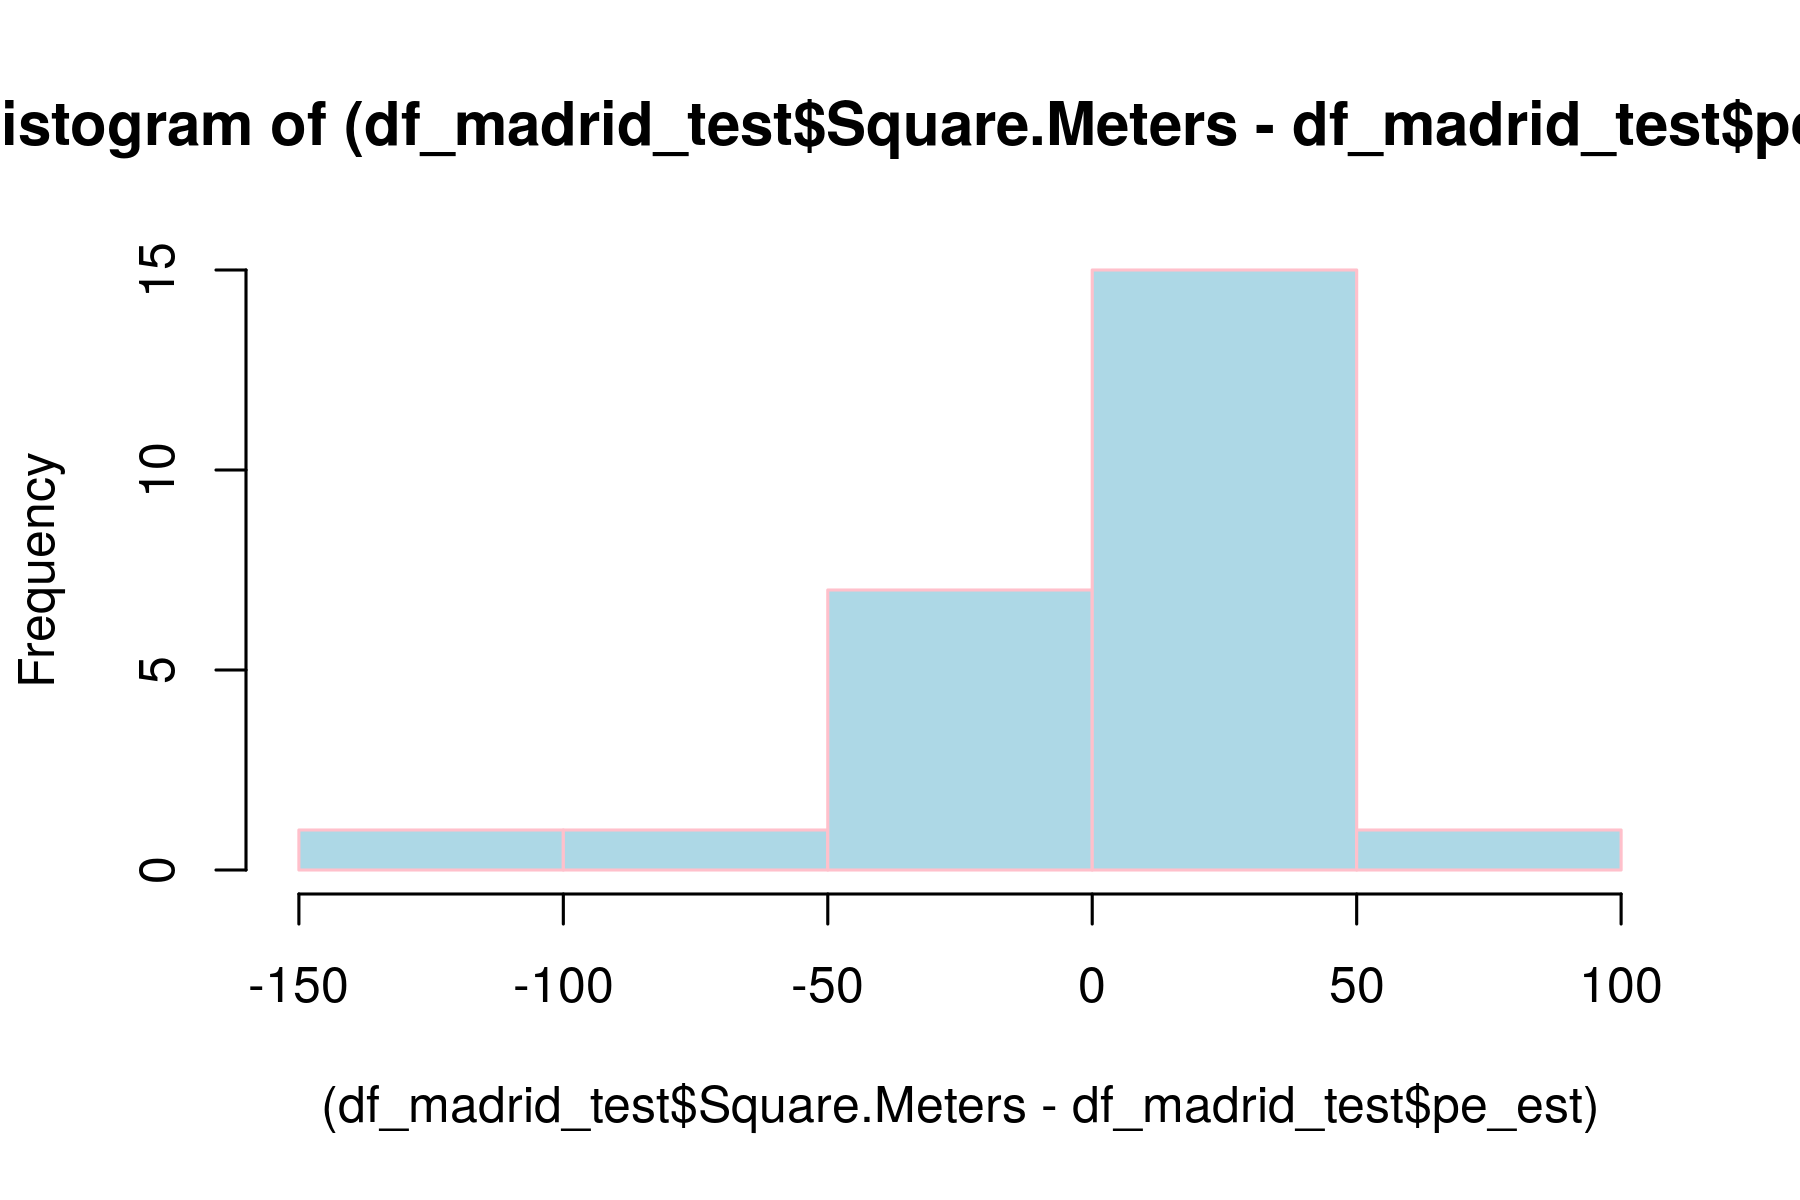

In [32]:
df_madrid_test$pe_est<-predict(model_df_madrid,df_madrid_test)
sum(is.na(df_madrid_test$pe_est))
length(df_madrid_test$pe_est)

hist((df_madrid_test$Square.Meters-df_madrid_test$pe_est), axes=TRUE, col = "lightblue", border = "pink")

In [33]:
#confint(lm(Square.Meters~.,data=df_madrid_train))
confint(lm(Square.Meters~Bathrooms+Bedrooms+Beds+neighb_id,data=df_madrid_train))
#confint(lm(Square.Meters~Accommodates+Bathrooms+Bedrooms+Beds+Price+Guests.Included+Review.Scores.Rating+neighb_id,data=df_madrid_train))

,2.5 %,97.5 %
(Intercept),-15.164126,17.27082171
Bathrooms,27.611055,46.13738878
Bedrooms,6.476494,20.35600533
Beds,2.300822,8.95318634
neighb_id2,-33.869395,1.19280603
neighb_id3,-49.281384,-6.41849266
neighb_id4,-34.403277,-4.60601797
neighb_id5,-35.566116,0.04270478
neighb_id6,-43.142414,14.74043435
neighb_id7,-25.973504,5.53992300


Si tuvieramos un anuncio de un apartamento para 6 personas (Accommodates) con un precio de 80€/noche y 3 habitaciones en el barrio de Sol.
¿Cuantos metros cuadrados tendría?
¿Como varía sus metros cuadrados con cada habitación adicional?

In [34]:
# He seleccionado cualquier registro y le he asignado las variables indicadas.
# He dejado variables para poder probar distintos resultados

var_Accommodates <- 6
var_Bedrooms <- 3
var_Price <- 80
var_neighb_id <- 7
apartamento_dado <- df_madrid[5000,]
apartamento_dado
apartamento_dado$Accommodates
apartamento_dado$Bedrooms
apartamento_dado$Price

,Neighbourhood,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Square.Meters,neighb_id
,<fct>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<fct>
5000,Sol,40.41878,-3.701261,2,1,1,1,57,1,0,94,NA,7


[1] 2

[1] 1

[1] 57

In [35]:
apartamento_dado$Accommodates <- var_Accommodates
apartamento_dado$Bedrooms <- var_Bedrooms
apartamento_dado$Price <- var_Price
apartamento_dado$neighb_id <- var_neighb_id
apartamento_dado$neighb_id <- as.factor(apartamento_dado$neighb_id)
apartamento_dado
apartamento_dado$Accommodates
apartamento_dado$Bedrooms
apartamento_dado$Price

,Neighbourhood,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Square.Meters,neighb_id
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<fct>
5000,Sol,40.41878,-3.701261,6,1,3,1,80,1,0,94,NA,7


[1] 6

[1] 3

[1] 80

In [36]:
#Calculo metros2 segun las condiciones marcadas.

metros_piso_estimado <- round(predict(model_df_madrid,apartamento_dado),2)
paste0("Los metros cuadrados para un piso en Sol -6 personas- -3 habitaciones- -80 euros- serian: ",metros_piso_estimado)

[1] "Los metros cuadrados para un piso en Sol -6 personas- -3 habitaciones- -80 euros- serian: 73.59"

In [37]:
valores_num_beds <- (1:max(df_madrid$Bedrooms, na.rm=TRUE))

for (i in 1:max(df_madrid$Bedrooms, na.rm=TRUE)) {
    apartamento_dado$Bedrooms <- i
    valores_num_beds[i] <- predict(model_df_madrid,apartamento_dado)
}

[1]  46.75403  60.17028  73.58653  87.00278 100.41903 113.83528 127.25153
 [8] 140.66778 154.08403 167.50028

[1] 40.61971

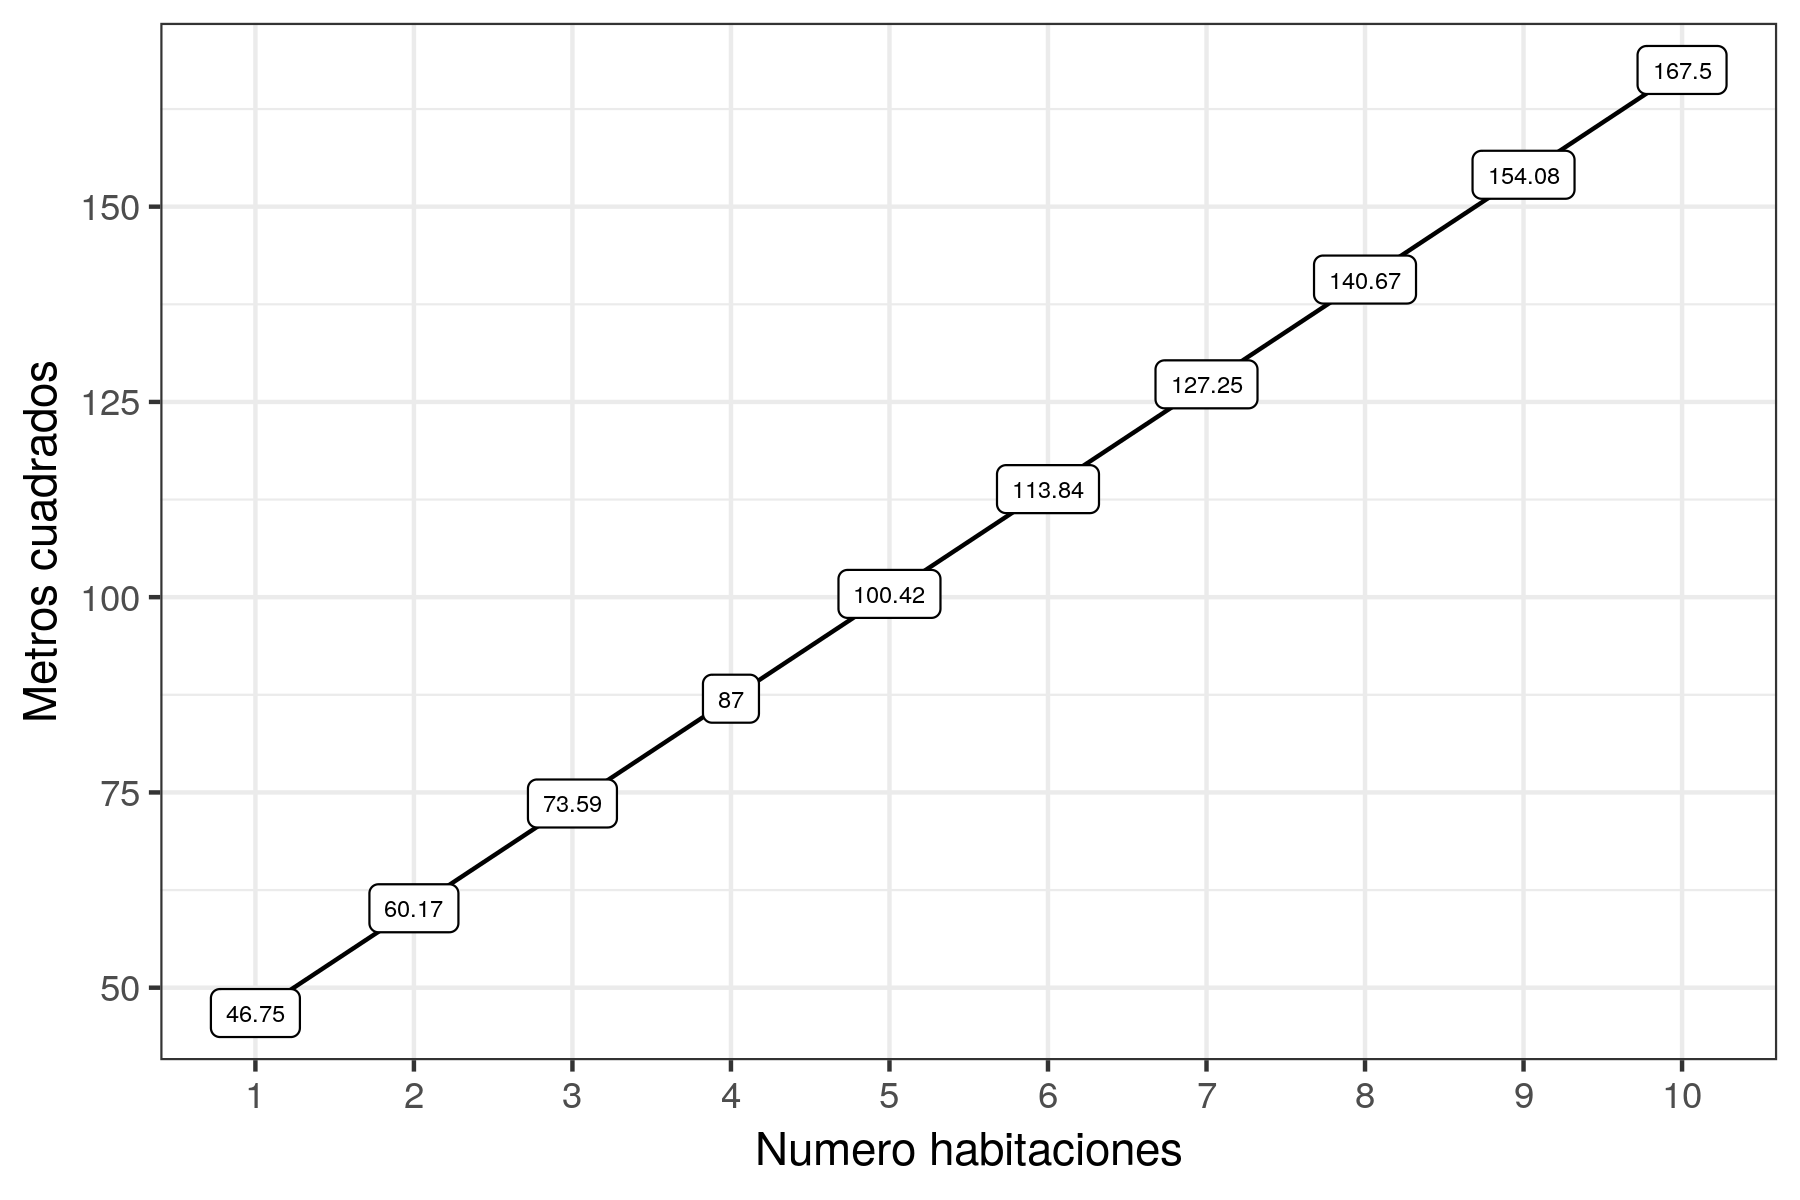

In [38]:
#Calculo segun aumenta el numero de habitaciones.

valores_num_beds
sd(valores_num_beds)

ggplot(data = data.frame(factor(1:10), valores_num_beds),
       aes(x = factor(1:10), y = valores_num_beds, group = 1)) +
  geom_point() +
  geom_line() +
  geom_label(aes(label = round(valores_num_beds,2)), size = 2) +
  theme_bw() +
  labs(x = "Numero habitaciones", 
       y = "Metros cuadrados")

Rellenar los Square.Meters con valor NA con el estimado con el modelo anterior.

In [39]:
aux <- (1:nrow(df_madrid))

In [40]:
for (i in 1:nrow(df_madrid)) {
    aux[i] <- predict(model_df_madrid,df_madrid[i,])
}

In [41]:
aux <- data.frame(aux)
colnames(aux)[colnames(aux) == 'aux'] <- 'Square.Meters_est'
sum(is.na(df_madrid$Square.Meters_est))

[1] 0

In [42]:
df_madrid_aux <- cbind(df_madrid, aux)
sum(is.na(df_madrid_aux$Square.Meters))
sum(is.na(df_madrid$Square.Meters))
head(df_madrid_aux)

[1] 5427

[1] 5427

,Neighbourhood,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Square.Meters,neighb_id,Square.Meters_est
,<fct>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<fct>,<dbl>
1,Acacias,40.39957,-3.702361,3,1,1,1,122,1,0,NA,NA,1,56.97082
2,Acacias,40.40030,-3.701024,2,1,1,1,60,1,0,80,NA,1,56.97082
3,Acacias,40.40226,-3.712753,6,1,2,3,50,2,10,68,NA,1,81.64108
4,Acacias,40.40270,-3.703143,2,1,2,1,75,1,0,NA,NA,1,70.38707
5,Acacias,40.39933,-3.701477,4,1,1,2,59,2,10,95,NA,1,62.59783
6,Acacias,40.40093,-3.703781,3,1,1,2,45,1,0,NA,NA,1,62.59783


In [43]:
df_madrid_aux$Square.Meters <- ifelse(is.na(df_madrid_aux$Square.Meters),
                                      df_madrid_aux$Square.Meters_est, df_madrid_aux$Square.Meters)

In [44]:
sum(is.na(df_madrid_aux$Square.Meters_est))
sum(is.na(df_madrid_aux$Square.Meters))
sum(is.na(df_madrid$Square.Meters_est))
df_madrid_aux

# No entiendo como en este camino de hacer cosas con los datos, me han aparecido mas NAs que al principio si arrastro lo mismo
# que en df_madrid$Square.Meters_est que tenia 0 valores con NA y ahora me salen algunos y encima distintos

[1] 24

[1] 21

[1] 0

Neighbourhood,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Square.Meters,neighb_id,Square.Meters_est
<fct>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<fct>,<dbl>
Acacias,40.39957,-3.702361,3,1.0,1,1,122,1,0,NA,56.97082,1,56.97082
Acacias,40.40030,-3.701024,2,1.0,1,1,60,1,0,80,56.97082,1,56.97082
Acacias,40.40226,-3.712753,6,1.0,2,3,50,2,10,68,81.64108,1,81.64108
Acacias,40.40270,-3.703143,2,1.0,2,1,75,1,0,NA,70.38707,1,70.38707
Acacias,40.39933,-3.701477,4,1.0,1,2,59,2,10,95,62.59783,1,62.59783
Acacias,40.40093,-3.703781,3,1.0,1,2,45,1,0,NA,62.59783,1,62.59783
Acacias,40.40435,-3.706820,4,2.0,2,4,90,2,25,92,124.14231,1,124.14231
Acacias,40.40233,-3.705738,2,1.0,1,1,65,1,0,100,56.97082,1,56.97082
Acacias,40.40504,-3.705093,2,1.0,0,1,22,1,5,97,43.55457,1,43.55457


In [45]:
df_madrid_aux$Square.Meters_est <- NULL

In [46]:
df_madrid <- df_madrid_aux
summary(df_madrid)

     Neighbourhood     Latitude       Longitude       Accommodates   
 Malasaña   : 679   Min.   :40.33   Min.   :-3.835   Min.   : 1.000  
 Embajadores: 585   1st Qu.:40.41   1st Qu.:-3.707   1st Qu.: 3.000  
 La Latina  : 571   Median :40.42   Median :-3.702   Median : 4.000  
 Sol        : 536   Mean   :40.42   Mean   :-3.699   Mean   : 4.101  
 Cortes     : 441   3rd Qu.:40.43   3rd Qu.:-3.696   3rd Qu.: 5.000  
 Justicia   : 384   Max.   :40.51   Max.   :-3.576   Max.   :16.000  
 (Other)    :2405                                                    
   Bathrooms        Bedrooms           Beds            Price       
 Min.   :0.000   Min.   : 0.000   Min.   : 1.000   Min.   : 10.00  
 1st Qu.:1.000   1st Qu.: 1.000   1st Qu.: 1.000   1st Qu.: 56.00  
 Median :1.000   Median : 1.000   Median : 2.000   Median : 75.00  
 Mean   :1.248   Mean   : 1.453   Mean   : 2.393   Mean   : 88.74  
 3rd Qu.:1.000   3rd Qu.: 2.000   3rd Qu.: 3.000   3rd Qu.:100.00  
 Max.   :6.500   Max.   :10.000 

Usar PCA para encontrar el apartamento más cercano a uno dado.

Este algoritmo nos ayudaría a dado un apartamento que el algoritmo nos devolvería los 5 apartamentos más similares.


Crearemos una función tal que le pasemos un apartamento con los siguientes datos:
* Accommodates	
* Bathrooms	
* Bedrooms	
* Beds	
* Price	
* Guests.Included	
* Extra.People	
* Review.Scores.Rating	
* Latitude	
* Longitude	
* Square.Meters

y nos devuelva los 5 más similares de:

In [47]:
df_madrid_data<-na.omit(df_madrid[,2:12])
prmydata <- prcomp(df_madrid_data, center = TRUE, scale. = TRUE)

dim(df_madrid_data)
summary(prmydata)
prmydata$sdev
prmydata$rotation[sample(1:nrow(prmydata$rotation),),]

[1] 4746   11

Importance of components:
                         PC1   PC2     PC3     PC4     PC5    PC6    PC7
Standard deviation     2.217 1.135 1.04043 1.00728 0.86714 0.7939 0.7028
Proportion of Variance 0.447 0.117 0.09841 0.09224 0.06836 0.0573 0.0449
Cumulative Proportion  0.447 0.564 0.66241 0.75465 0.82301 0.8803 0.9252
                           PC8     PC9    PC10   PC11
Standard deviation     0.61148 0.51824 0.38644 0.1755
Proportion of Variance 0.03399 0.02442 0.01358 0.0028
Cumulative Proportion  0.95921 0.98362 0.99720 1.0000

[1] 2.2173602 1.1346296 1.0404278 1.0072785 0.8671408 0.7939270 0.7028170
 [8] 0.6114806 0.5182363 0.3864380 0.1755367

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Review.Scores.Rating,0.03370794,0.13789198,0.269294341,0.91354285,-0.02331805,0.2587893,-0.05937519,0.002364550,-0.02181605,-0.035303018,0.0008535958
Bedrooms,0.39245161,-0.03182519,-0.110726908,-0.01428086,0.08173862,0.1503838,-0.25140587,-0.001300805,0.80652586,0.001737159,-0.2991896100
Bathrooms,0.36510471,-0.10489310,-0.165225082,0.16154713,-0.14077462,-0.4098812,0.12059895,0.575067309,-0.24027005,-0.079509673,-0.4529692017
Latitude,0.01969230,-0.67673604,0.195049768,-0.06374440,-0.63247839,0.3135323,-0.02635969,0.006238859,-0.01238128,-0.017601015,0.0021168323
Extra.People,0.13026452,0.23133194,0.763388871,-0.17801405,-0.17384213,-0.3979391,-0.35380931,-0.012698309,0.02716193,0.019683290,-0.0045828197
Price,0.33902068,-0.04601624,-0.104637551,0.16479181,-0.21607856,-0.4075071,0.38140303,-0.694384466,0.03966246,0.053279274,0.0063495912
Square.Meters,0.42715461,-0.05150054,-0.158220137,0.06502423,-0.03423217,-0.1073223,-0.12207477,0.278232630,0.05681883,0.126807208,0.8132102187
Beds,0.39011302,0.01405410,-0.058964931,-0.08677999,0.13634431,0.2939183,-0.31992290,-0.194740622,-0.44547347,0.591803538,-0.2065825660
Accommodates,0.40103027,0.07199826,-0.003113654,-0.13956805,0.10596315,0.2541823,-0.13900781,-0.175999215,-0.28666173,-0.778237123,0.0232027339
Guests.Included,0.28828318,0.17107846,0.386747385,-0.19353496,0.10387106,0.3467109,0.71406676,0.195557281,0.06942613,0.128049964,0.0157242540


In [48]:
dim(prmydata$x)
prmydata$center
prmydata$scale
str(prmydata)

[1] 4746   11

Latitude            Longitude         Accommodates 
           40.420011            -3.698884             4.140961 
           Bathrooms             Bedrooms                 Beds 
            1.243574             1.446271             2.410451 
               Price      Guests.Included         Extra.People 
           85.608934             2.018331             9.201011 
Review.Scores.Rating        Square.Meters 
           91.314370            64.344245

Latitude            Longitude         Accommodates 
          0.01597124           0.01749483           1.91057714 
           Bathrooms             Bedrooms                 Beds 
          0.51600904           0.96107586           1.55058313 
               Price      Guests.Included         Extra.People 
         52.98150100           1.28895815          11.46134048 
Review.Scores.Rating        Square.Meters 
          8.87647297          36.59263941

List of 5
 $ sdev    : num [1:11] 2.217 1.135 1.04 1.007 0.867 ...
 $ rotation: num [1:11, 1:11] 0.0197 0.0259 0.401 0.3651 0.3925 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:11] "Latitude" "Longitude" "Accommodates" "Bathrooms" ...
  .. ..$ : chr [1:11] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:11] 40.42 -3.7 4.14 1.24 1.45 ...
  ..- attr(*, "names")= chr [1:11] "Latitude" "Longitude" "Accommodates" "Bathrooms" ...
 $ scale   : Named num [1:11] 0.016 0.0175 1.9106 0.516 0.9611 ...
  ..- attr(*, "names")= chr [1:11] "Latitude" "Longitude" "Accommodates" "Bathrooms" ...
 $ x       : num [1:4746, 1:11] -1.812 0.44 -0.688 2.005 -1.708 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:4746] "2" "3" "5" "7" ...
  .. ..$ : chr [1:11] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


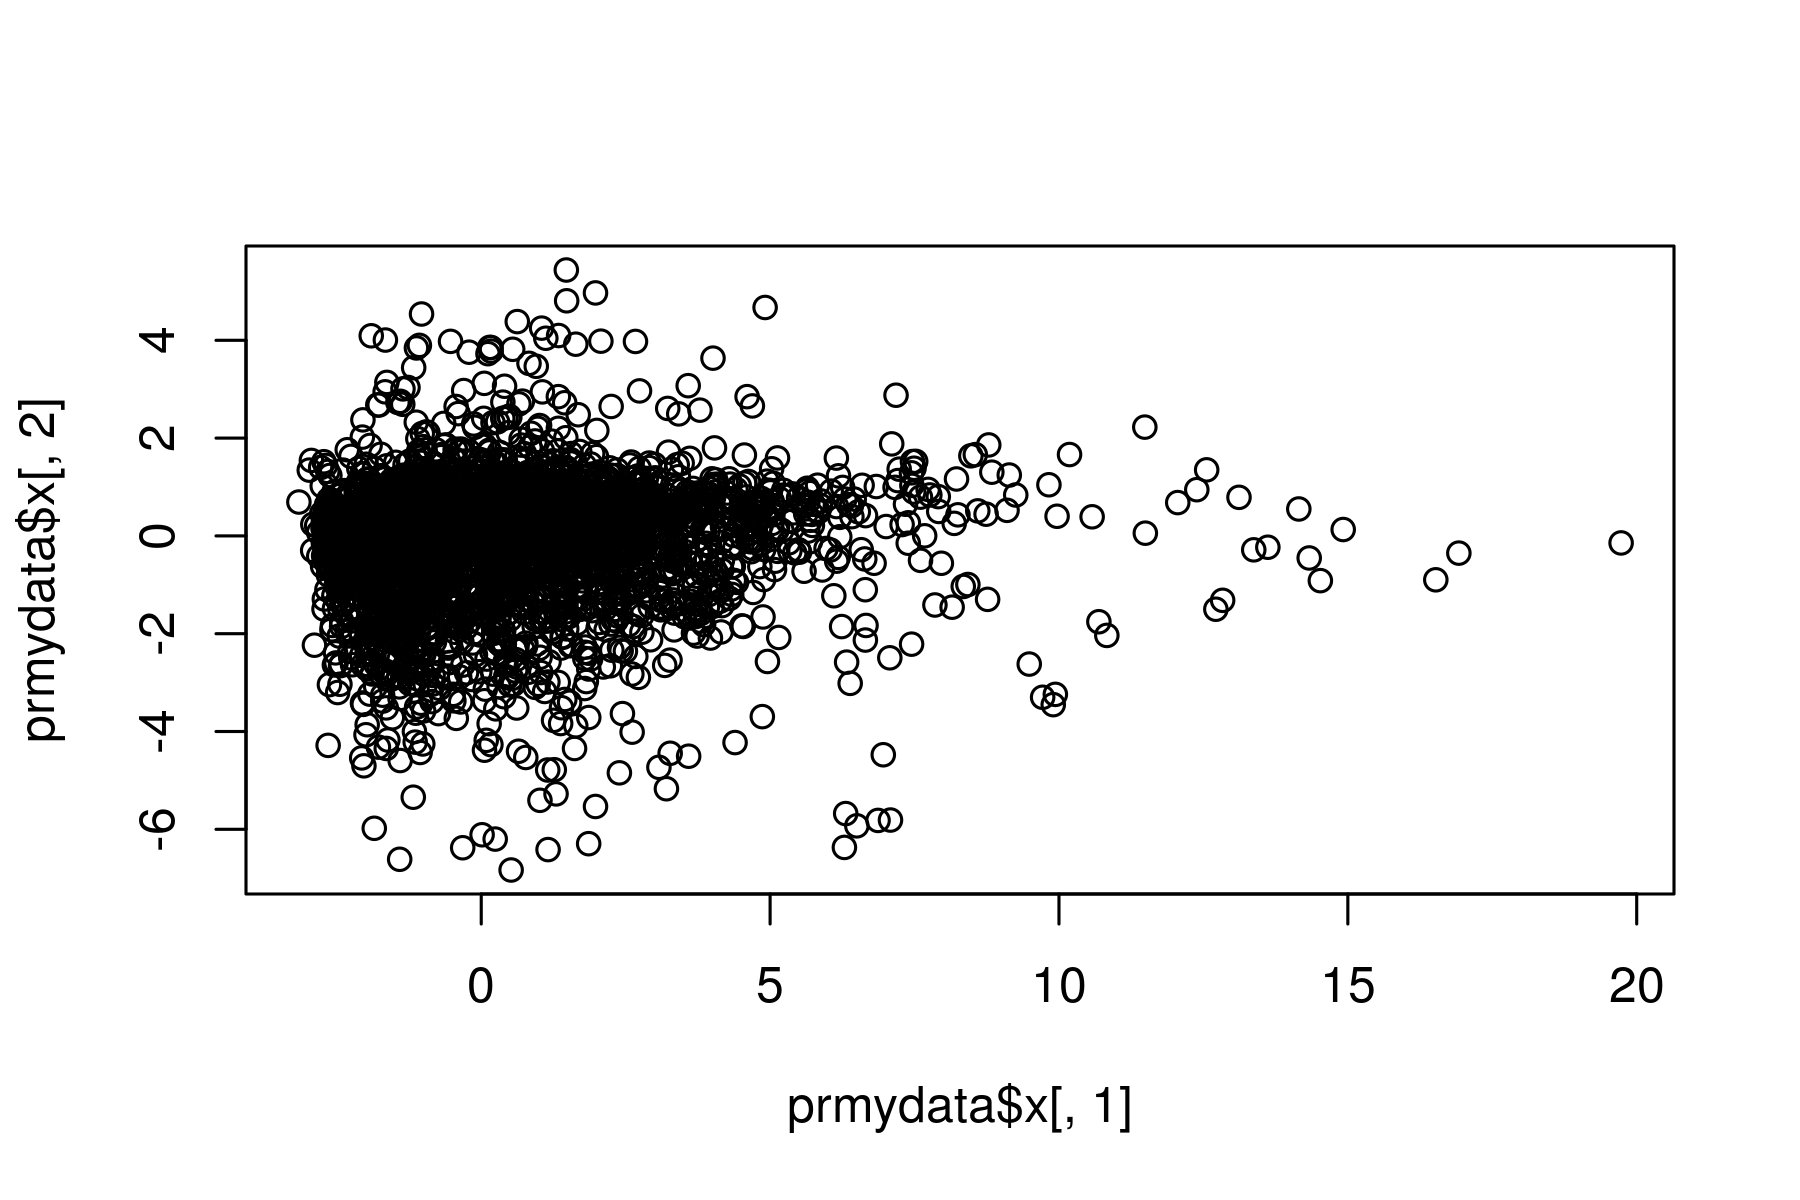

In [49]:
plot(prmydata$x[,1],prmydata$x[,2])

In [50]:
indice_apar <- 250
apartamento_ejemplo <- df_madrid_data[indice_apar,]
apartamento_ejemplo
prmydata$x[indice_apar,]

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Square.Meters
,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
328,40.42585,-3.718551,4,2,2,2,180,1,0,100,112.8883


PC1         PC2         PC3         PC4         PC5         PC6 
 1.47786618 -0.03772750 -1.58421584  1.71054468 -1.58759007 -0.84969673 
        PC7         PC8         PC9        PC10        PC11 
 0.26261323 -0.04625925  0.30997825 -0.08366479  0.27531986

In [51]:
apartamento_devuelto <- predict(prmydata, apartamento_ejemplo)

In [52]:
apartamento_devuelto 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
328,1.477866,-0.0377275,-1.584216,1.710545,-1.58759,-0.8496967,0.2626132,-0.04625925,0.3099783,-0.08366479,0.2753199


In [53]:
dist <- rowSums((apartamento_devuelto[rep(1, times = nrow(prmydata$x)),]-prmydata$x)^2)
paste0("Distancia minina: ", min(dist))
which.min(dist)
df_madrid_data[which.min(dist),]

[1] "Distancia minina: 0"

328 
250

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Square.Meters
,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
328,40.42585,-3.718551,4,2,2,2,180,1,0,100,112.8883


In [54]:
order(dist)[1:5]
df_madrid_data[order(dist)[1:5],]

[1]  250  268  309 2361 3681

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Square.Meters
,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
328,40.42585,-3.718551,4,2,2,2,180,1,0,100,112.88830
346,40.42498,-3.712715,4,2,2,3,180,1,0,100,118.51530
403,40.42976,-3.718372,4,2,2,2,140,1,0,100,112.88830
2826,40.41148,-3.709497,4,2,2,2,170,1,0,100,93.38365
4359,40.41949,-3.712164,4,2,2,2,220,1,0,94,102.67151


In [55]:
npisos_parecidos <- 5

findPisos <- function(pca_df,new_vector,npisos_parecidos){
    apartamento_ejemplo <- df_madrid_data[indice_apar,]
    dist <- rowSums((apartamento_devuelto[rep(1, times = nrow(prmydata$x)),]-prmydata$x)^2)
    apartamento_devuelto <- predict(prmydata, apartamento_ejemplo)
    df_madrid_data[order(dist)[1:npisos_parecidos],]
}

In [56]:
findPisos(apartamento_ejemplo,apartamento_devuelto,npisos_parecidos)

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Square.Meters
,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
328,40.42585,-3.718551,4,2,2,2,180,1,0,100,112.88830
346,40.42498,-3.712715,4,2,2,3,180,1,0,100,118.51530
403,40.42976,-3.718372,4,2,2,2,140,1,0,100,112.88830
2826,40.41148,-3.709497,4,2,2,2,170,1,0,100,93.38365
4359,40.41949,-3.712164,4,2,2,2,220,1,0,94,102.67151


Bonus: ¿de todas las coordenadas PCA cual es la que mejor permite clasificar por id de barrio?

¿Por qué?

In [57]:
summary(prmydata)
prmydata$sdev
prmydata$rotation[sample(1:nrow(prmydata$rotation),),]

Importance of components:
                         PC1   PC2     PC3     PC4     PC5    PC6    PC7
Standard deviation     2.217 1.135 1.04043 1.00728 0.86714 0.7939 0.7028
Proportion of Variance 0.447 0.117 0.09841 0.09224 0.06836 0.0573 0.0449
Cumulative Proportion  0.447 0.564 0.66241 0.75465 0.82301 0.8803 0.9252
                           PC8     PC9    PC10   PC11
Standard deviation     0.61148 0.51824 0.38644 0.1755
Proportion of Variance 0.03399 0.02442 0.01358 0.0028
Cumulative Proportion  0.95921 0.98362 0.99720 1.0000

[1] 2.2173602 1.1346296 1.0404278 1.0072785 0.8671408 0.7939270 0.7028170
 [8] 0.6114806 0.5182363 0.3864380 0.1755367

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Price,0.33902068,-0.04601624,-0.104637551,0.16479181,-0.21607856,-0.4075071,0.38140303,-0.694384466,0.03966246,0.053279274,0.0063495912
Longitude,0.02589805,-0.64657973,0.279412018,0.08680681,0.67397227,-0.1922681,0.03023279,-0.048627870,-0.01327759,-0.023058057,0.0215665225
Guests.Included,0.28828318,0.17107846,0.386747385,-0.19353496,0.10387106,0.3467109,0.71406676,0.195557281,0.06942613,0.128049964,0.0157242540
Accommodates,0.40103027,0.07199826,-0.003113654,-0.13956805,0.10596315,0.2541823,-0.13900781,-0.175999215,-0.28666173,-0.778237123,0.0232027339
Bathrooms,0.36510471,-0.10489310,-0.165225082,0.16154713,-0.14077462,-0.4098812,0.12059895,0.575067309,-0.24027005,-0.079509673,-0.4529692017
Square.Meters,0.42715461,-0.05150054,-0.158220137,0.06502423,-0.03423217,-0.1073223,-0.12207477,0.278232630,0.05681883,0.126807208,0.8132102187
Review.Scores.Rating,0.03370794,0.13789198,0.269294341,0.91354285,-0.02331805,0.2587893,-0.05937519,0.002364550,-0.02181605,-0.035303018,0.0008535958
Extra.People,0.13026452,0.23133194,0.763388871,-0.17801405,-0.17384213,-0.3979391,-0.35380931,-0.012698309,0.02716193,0.019683290,-0.0045828197
Bedrooms,0.39245161,-0.03182519,-0.110726908,-0.01428086,0.08173862,0.1503838,-0.25140587,-0.001300805,0.80652586,0.001737159,-0.2991896100
Latitude,0.01969230,-0.67673604,0.195049768,-0.06374440,-0.63247839,0.3135323,-0.02635969,0.006238859,-0.01238128,-0.017601015,0.0021168323


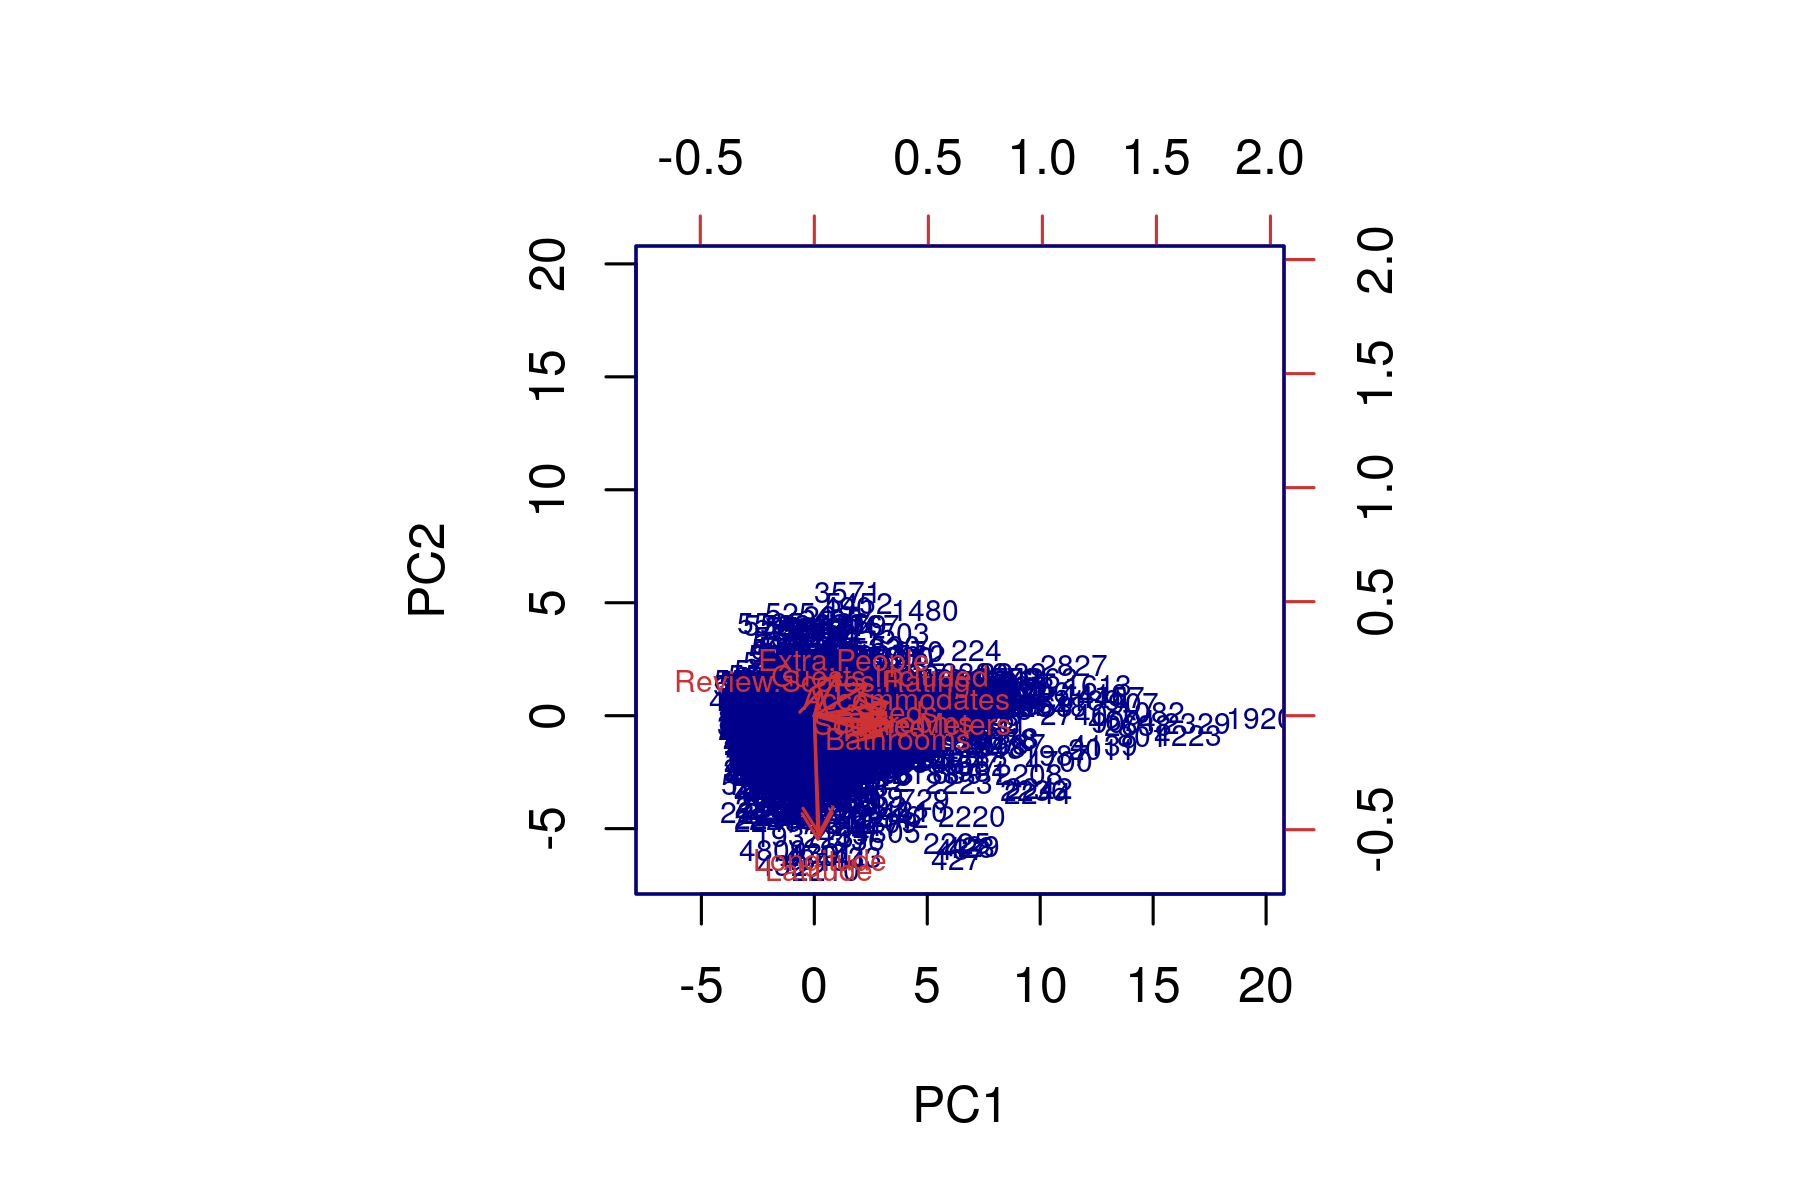

In [58]:
biplot(x = prmydata, scale = 0, cex = 0.6, col = c("blue4", "brown3"))

Algunos componentes tienen mas influencia en la latitud y longitud que otros, pero vemos tambien como latitud y longitud tiran mucho.

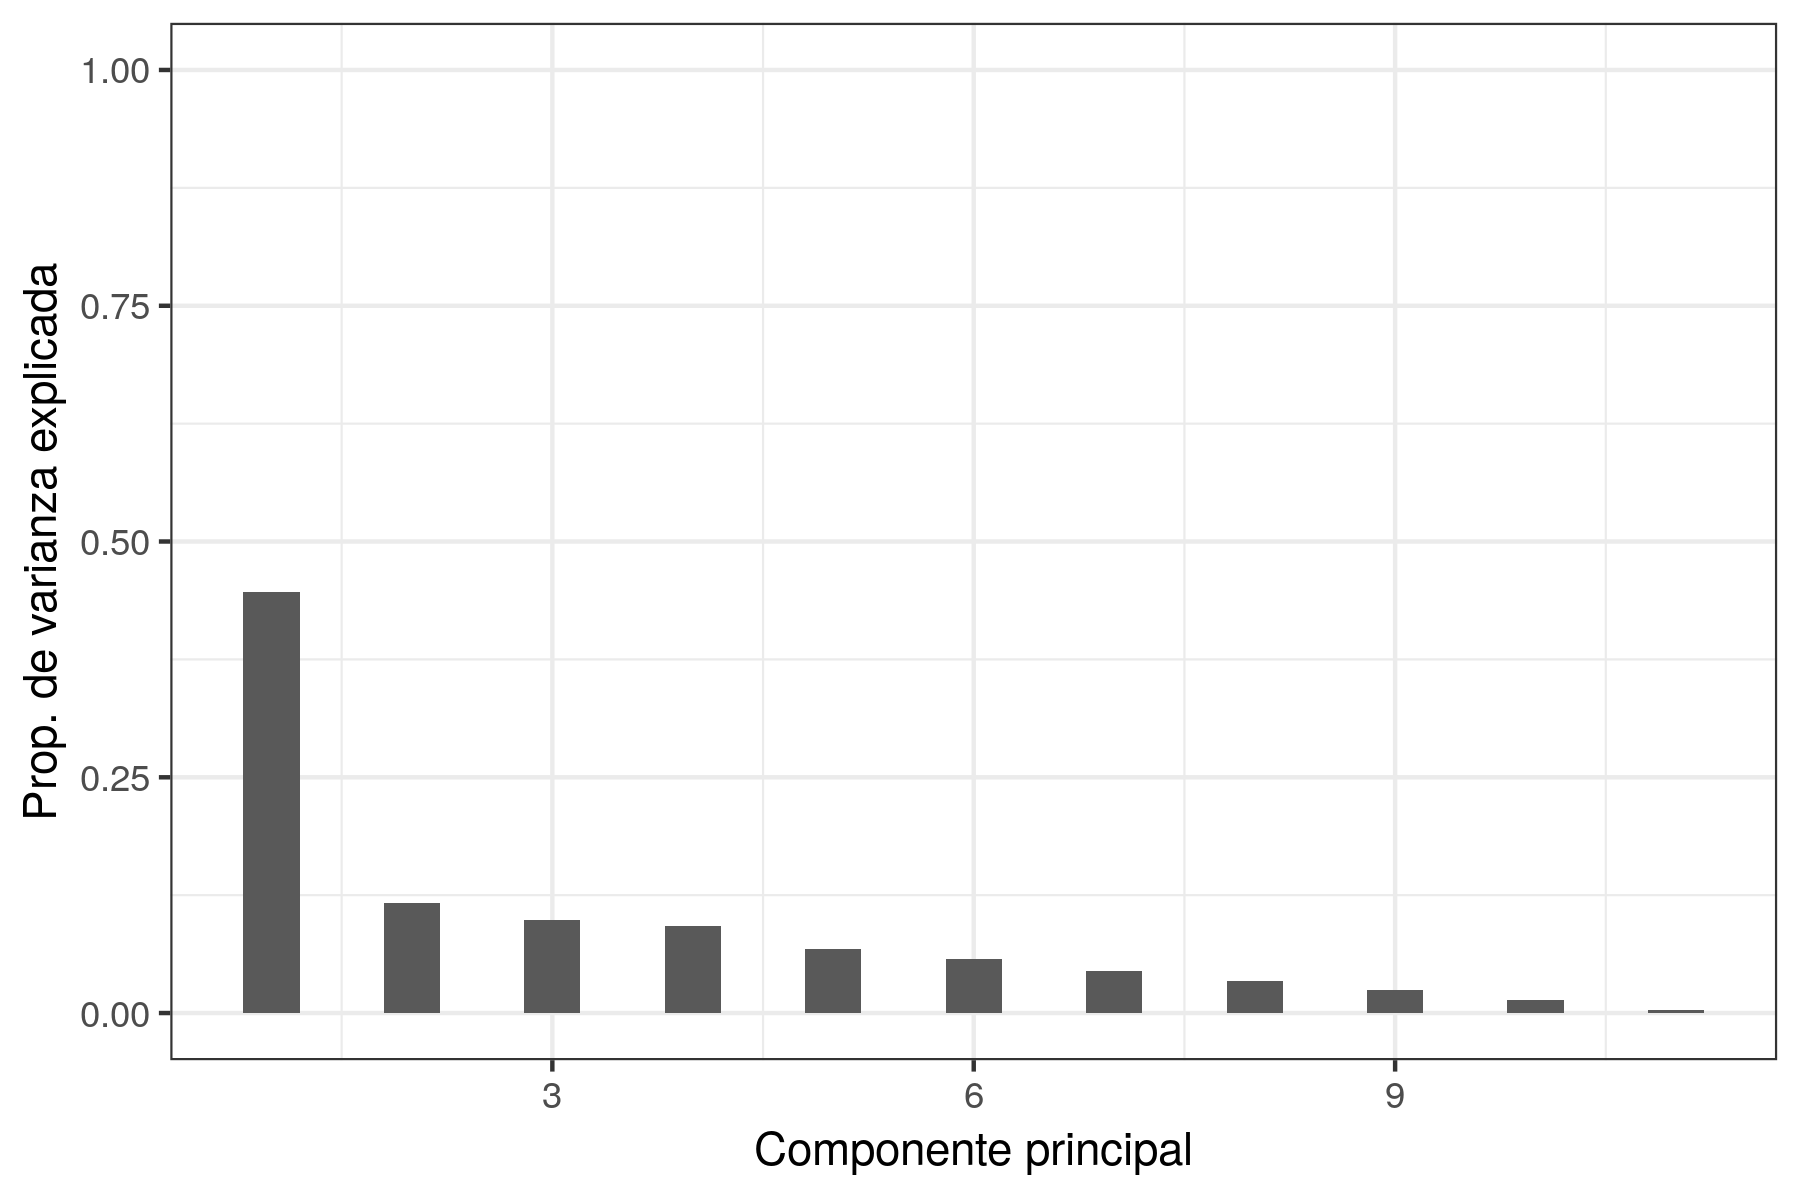

In [59]:
prop_varianza <- prmydata$sdev^2 / sum(prmydata$sdev^2)

ggplot(data = data.frame(prop_varianza, pc = 1:11),
       aes(x = pc, y = prop_varianza)) +
  geom_col(width = 0.4) +
  scale_y_continuous(limits = c(0,1)) +
  theme_bw() +
  labs(x = "Componente principal",
       y = "Prop. de varianza explicada")

[1] 0.4469715 0.5640064 0.6624146 0.7546519 0.8230094 0.8803112 0.9252159
 [8] 0.9592076 0.9836230 0.9971988 1.0000000

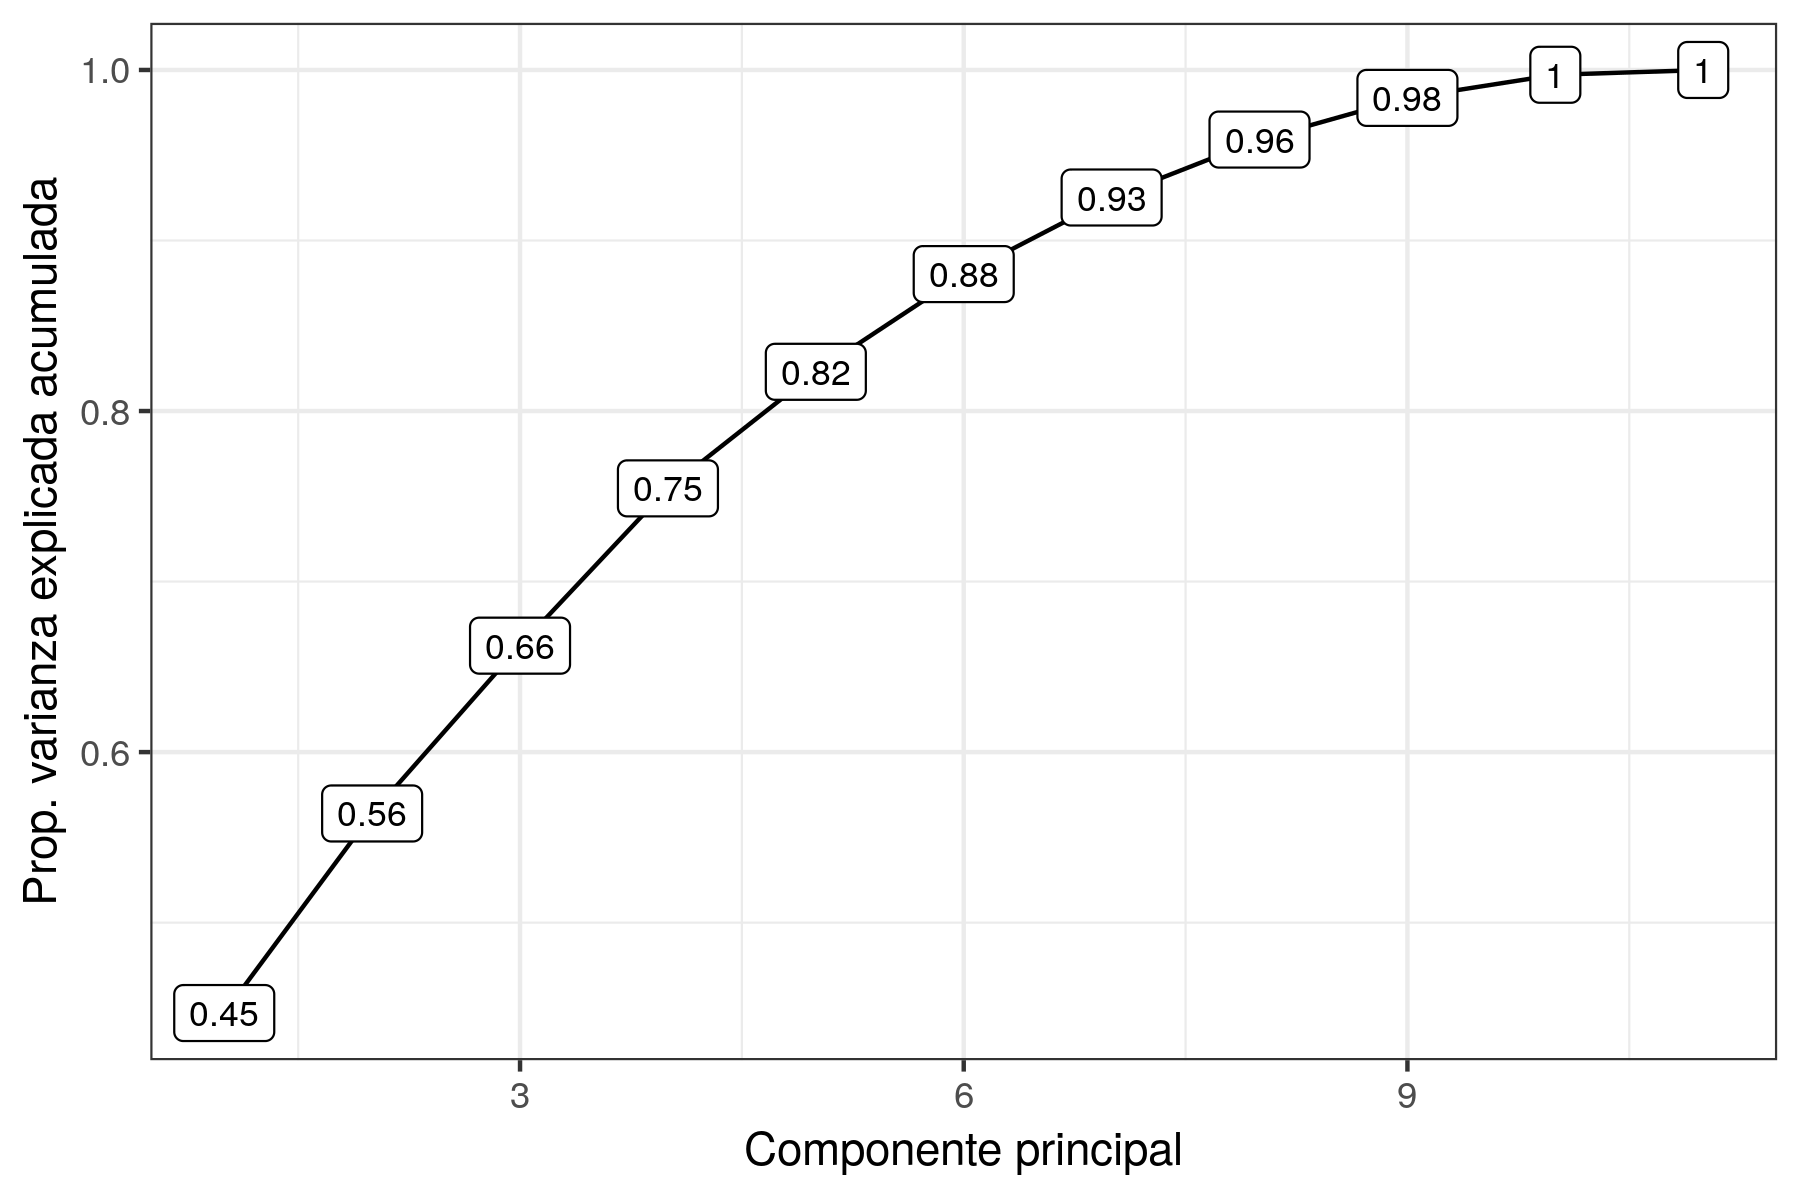

In [60]:
prop_varianza_acum <- cumsum(prop_varianza)
prop_varianza_acum

ggplot(data = data.frame(prop_varianza_acum, pc = 1:11),
       aes(x = pc, y = prop_varianza_acum, group = 1)) +
  geom_point() +
  geom_line() +
  geom_label(aes(label = round(prop_varianza_acum,2)), size=3) +
  theme_bw() +
  labs(x = "Componente principal",
       y = "Prop. varianza explicada acumulada")

El estudio de la proporción de varianza explicada muestra que la primera componente recoge la mayor parte de la información (45%), decayendo drásticamente la varianza en las sucesivas componentes.
Ninguna otra componente recoge tanta cantidad de informacion.

Acorde a la proporción de varianza acumulada, las 6 primeras componentes explican el 88 % de varianza.

No he podido descubrir cual influye mas en la ID del barrio, no he sabido comparar con algo que no tenia en el dato cargado, solo sabia "interpretar" datos que veia, lo siento pero no lo he podido descubrir...asi que he intentado explicar un poco la carga de cada PCA, o al menos espero haberlo interpretado correctamente.